<a href="https://colab.research.google.com/github/Aisha-fahad/DATA-MINING-PROJECT-/blob/main/Reports/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[1] Problem**


**1-Project Goal:**


To build a decision‑support model that uses applicant data (income, credit history, employment, etc.) to reliably and fairly classify loan applications as Approved or Rejected, selecting the right person for the loan and minimizing risk.

**2-Dataset Source:**


The Source is Kaggle
URL:https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data?resource=download

**3-Dataset Description:**


1- Number of attributes (columns): 14


  Data Types:

• person_age → Numeric (34, 47)

 • person_gender → Binary (Male, Female)

 • person_education → Ordinal (High School, Bachelor, Master)

 • person_income → Numeric (32000, 55000)

 • person_emp_exp → Numeric (2, 5, 10)

 • person_home_ownership → Nominal (Own, Rent, Mortgage)

 • loan_intent → Nominal (Education, Medical, Personal)

 • loan_grade → Ordinal (A, B, C, D)

 • loan_amnt → Numeric (5000, 20000)

 • loan_int_rate → Numeric (7.5, 13.2)

 • loan_percent_income → Numeric (0.2, 0.5)

 • cb_person_default_on_file → Binary (Yes, No)

 • cb_person_cred_hist_length → Numeric (3, 10, 15)

 • loan_status → Binary (Approved, Rejected)



2- Number of instances (rows): 45000


3- Class attribute distribution (loan_status):

 Approved =1, Rejected=0


0    35000

1    10000


4- To Show The DataSet Sample Run The Code




In [ ]:
import pandas as pd


df = pd.read_csv("loan_data.csv")


print("Number of attributes (columns):", len(df.columns))
print("\nData types of each attribute:")
print(df.dtypes)


print("\nNumber of instances (rows):", len(df))


print("\nClass attribute distribution (loan_status):")
print(df['loan_status'].value_counts())

# Print a sample of the raw dataset
print("\nSample of the dataset:")
print(df.head(10))

Number of attributes (columns): 14

Data types of each attribute:
person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

Number of instances (rows): 45000

Class attribute distribution (loan_status):
loan_status
0    35000
1    10000
Name: count, dtype: int64

Sample of the dataset:
   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        2


# **[2] Data Mining Task**

This problem is formalized as two key data mining tasks:

### **1. Classification Task**

The primary goal is to build a predictive model that classifies loan applications into two categories:

* **Approved**
* **Rejected**

The model uses applicant features (income, credit history, employment, etc.) to learn patterns that distinguish approved from rejected cases. This supports automation and improves accuracy and consistency in loan decisions.

### **2. Clustering Task**

In addition to classification, clustering is used to group applicants into clusters based on similarities in their attributes. This helps in:

* Identifying hidden patterns in the applicant population
* Understanding different risk segments
* Exploring groups with similar credit behaviors or financial backgrounds

Clustering adds an exploratory layer to the project, providing deeper insight into applicant characteristics before building the classification model.


# **[3] Data**

## **Start of Data Analysis**

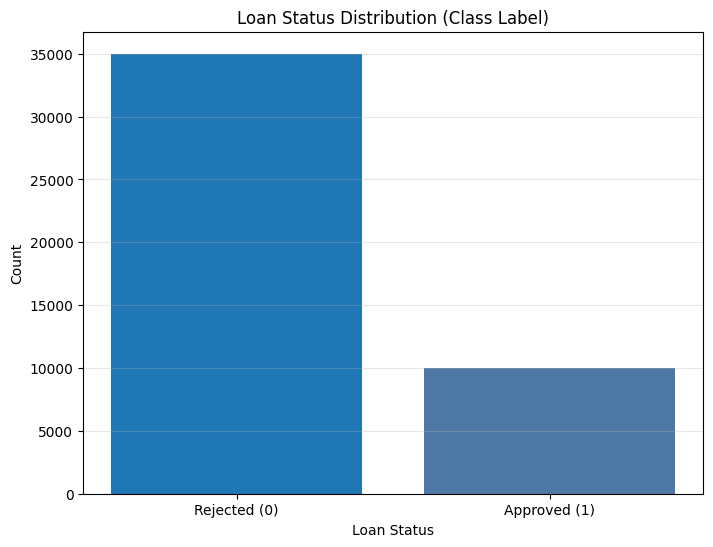

In [ ]:
plt.figure(figsize=(8, 6))
loan_status_counts = df['loan_status'].value_counts()
blue_colors = ['#1f77b4', '#4e79a7']  # Dark blue for Rejected, Light blue for Approved

plt.bar(['Rejected (0)', 'Approved (1)'], loan_status_counts.values, color=blue_colors)
plt.title('Loan Status Distribution (Class Label)')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.show()

# **Loan Status (Class Label)**

This bar chart shows the distribution of loan status in the dataset. The chart indicates that the number of rejected loans is significantly higher than the number of approved loans, suggesting an imbalanced dataset where loan rejections are much more frequent than approvals.

## **Data Analysis**: Numeric Attrbutes (five number summary, outliers, boxplots and histogram).

Five-number summary for: person_age
Minimum: 20.0
Q1 (25%): 24.0
Median (50%): 26.0
Q3 (75%): 30.0
Maximum: 144.0

Outliers in person_age :
81       144.0
183      144.0
575      123.0
747      123.0
29120     40.0
         ...  
44916     42.0
44923     47.0
44947     42.0
44972     43.0
44977     43.0
Name: person_age, Length: 2188, dtype: float64


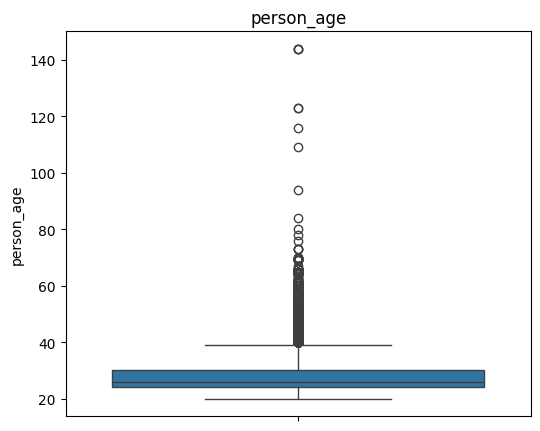

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/loan_data.csv")

# Five-number summary
col = "person_age"

print("Five-number summary for:", col)
print("Minimum:", df[col].min())
print("Q1 (25%):", df[col].quantile(0.25))
print("Median (50%):", df[col].median())
print("Q3 (75%):", df[col].quantile(0.75))
print("Maximum:", df[col].max())


Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

print("\nOutliers in", col, ":")
print(outliers)

# Boxplot
plt.figure(figsize=(6, 5))
sns.boxplot(y=df['person_age'])
plt.title('person_age')
plt.ylabel('person_age')
plt.show()

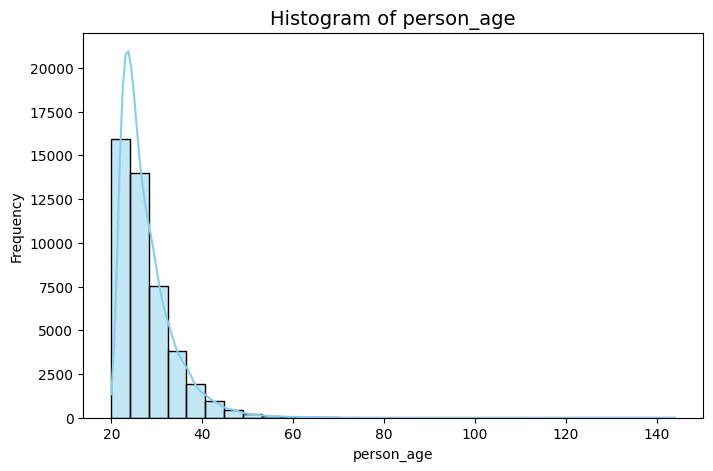

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/loan_data.csv")

plt.figure(figsize=(8,5))
sns.histplot(df['person_age'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of person_age', fontsize=14)
plt.xlabel('person_age')
plt.ylabel('Frequency')
plt.show()

# **person_age (Age of the person)**

**Description:**

   • The histogram provides a clear visualization of the distribution of applicants’ ages.

 • Most values are concentrated between 25–55 years, while a few values fall below 18 or above 100.

**What information it provides about the dataset:**

 • The variable person_age is numeric (continuous).

 • There are extreme values (below 18 and above 100), indicating potential outliers or data entry errors.

 • The majority of data points are clustered in a reasonable age range.

**How this information helped to decide that the data needs preprocessing:**

  • Outlier handling is required to correct or remove unrealistic age values.
  
 • Optionally, ages can be binned into categories for easier analysis.

Five Number Summary for person_income:
min       8000.00
25%      47204.00
50%      67048.00
75%      95789.25
max    7200766.00
Name: person_income, dtype: float64

(Outliers): 2218
lower_bound: -25673.875
upper_bound: 168667.125


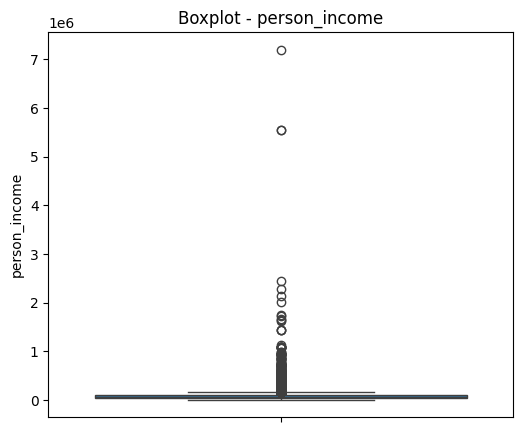

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/loan_data.csv")

# Five Number Summary
print("Five Number Summary for person_income:")
print(df['person_income'].describe()[['min','25%','50%','75%','max']])


Q1 = df['person_income'].quantile(0.25)
Q3 = df['person_income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['person_income'] < lower_bound) | (df['person_income'] > upper_bound)]
print("\n(Outliers):", outliers['person_income'].count())
print("lower_bound:", lower_bound)
print("upper_bound:", upper_bound)

#  Boxplot
plt.figure(figsize=(6, 5))
sns.boxplot(y=df['person_income'])
plt.title('Boxplot - person_income')
plt.ylabel('person_income')
plt.show()

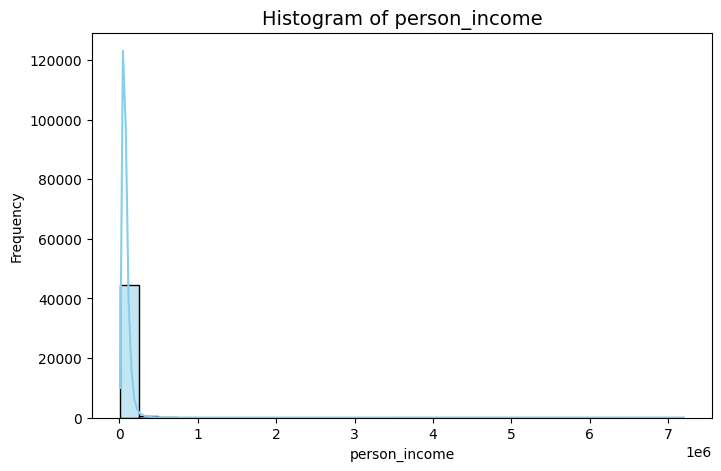

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['person_income'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of person_income', fontsize=14)
plt.xlabel('person_income')
plt.ylabel('Frequency')
plt.show()

# **person_income (Annual income)**

**Description:**

 • The histogram displays the distribution of applicants’ annual income.

 • The distribution is right-skewed, with most individuals earning low to moderate incomes, and a few extreme high-income values.

**What information it provides about the dataset:**

  • The variable person_income is numeric (continuous).

 • Skewness and extreme values indicate potential influence on modeling.

 • Most data points are concentrated in the lower to mid-income range.

**How this information helped to decide that the data needs preprocessing:**

 • Normalization can be applied to make the data more balanced and consistent.

 • Extreme values may need to be handle or removed.


Five Number Summary for loan_amnt:
min      500.00
25%     5000.00
50%     8000.00
75%    12237.25
max    35000.00
Name: loan_amnt, dtype: float64

(Outliers): 2348
lower_bound: -5855.875
upper_bound: 23093.125


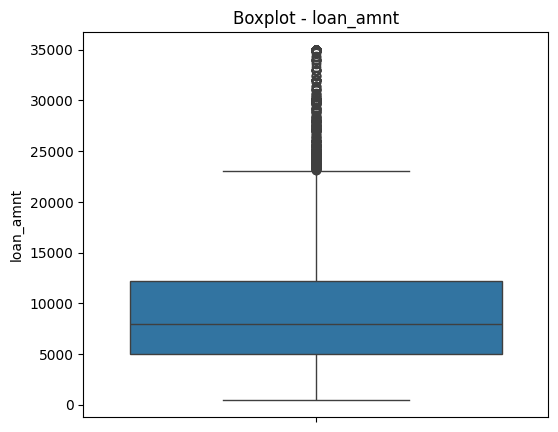

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/loan_data.csv")

# Five Number Summary
print("Five Number Summary for loan_amnt:")
print(df['loan_amnt'].describe()[['min','25%','50%','75%','max']])

Q1 = df['loan_amnt'].quantile(0.25)
Q3 = df['loan_amnt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['loan_amnt'] < lower_bound) | (df['loan_amnt'] > upper_bound)]
print("\n(Outliers):", outliers['loan_amnt'].count())
print("lower_bound:", lower_bound)
print("upper_bound:", upper_bound)

# Boxplot
plt.figure(figsize=(6, 5))
sns.boxplot(y=df['loan_amnt'])
plt.title('Boxplot - loan_amnt')
plt.ylabel('loan_amnt')
plt.show()

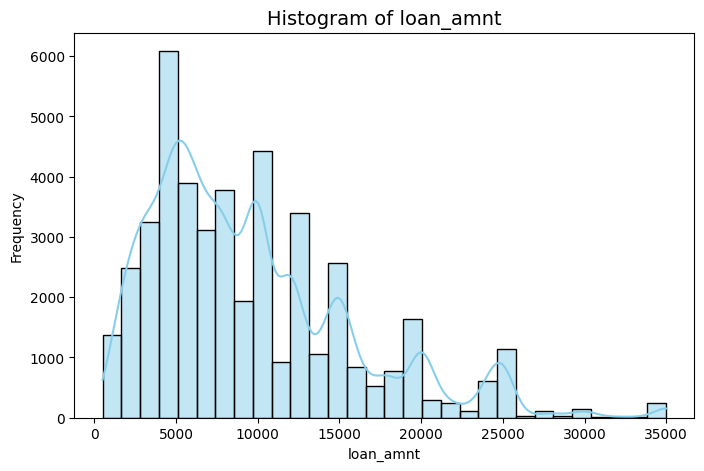

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['loan_amnt'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of loan_amnt', fontsize=14)
plt.xlabel('loan_amnt')
plt.ylabel('Frequency')
plt.show()

# **loan_amnt (Loan amount requested)**



**Description:**

  • The histogram presents the distribution of requested loan amounts.

 • Most loans are in the low-to-medium range, while a few are exceptionally large.

**What information it provides about the dataset:**

  • The variable loan_amnt is numeric (continuous).

 • Extremely high loan amounts can disproportionately affect models.

 • Majority of values are within a reasonable range.

**How this information helped to decide that the data needs preprocessing:**


 • Although the majority of values are within a reasonable range, several outliers appear with significantly higher loan amounts than the rest.

• These outliers may distort the statistical analysis and reduce model accuracy if left unaddressed.

Five Number Summary for loan_int_rate:
min     5.42
25%     8.59
50%    11.01
75%    12.99
max    20.00
Name: loan_int_rate, dtype: float64

(Outliers): 124
lower_bound: 1.9899999999999993
upper_bound: 19.59


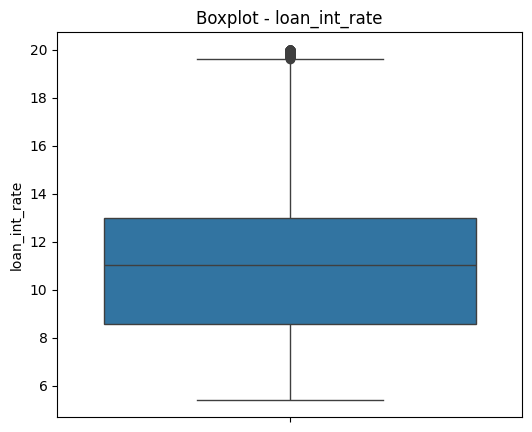

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/loan_data.csv")

# Five Number Summary
print("Five Number Summary for loan_int_rate:")
print(df['loan_int_rate'].describe()[['min','25%','50%','75%','max']])

Q1 = df['loan_int_rate'].quantile(0.25)
Q3 = df['loan_int_rate'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['loan_int_rate'] < lower_bound) | (df['loan_int_rate'] > upper_bound)]
print("\n(Outliers):", outliers['loan_int_rate'].count())
print("lower_bound:", lower_bound)
print("upper_bound:", upper_bound)

# Boxplot
plt.figure(figsize=(6, 5))
sns.boxplot(y=df['loan_int_rate'])
plt.title('Boxplot - loan_int_rate')
plt.ylabel('loan_int_rate')
plt.show()

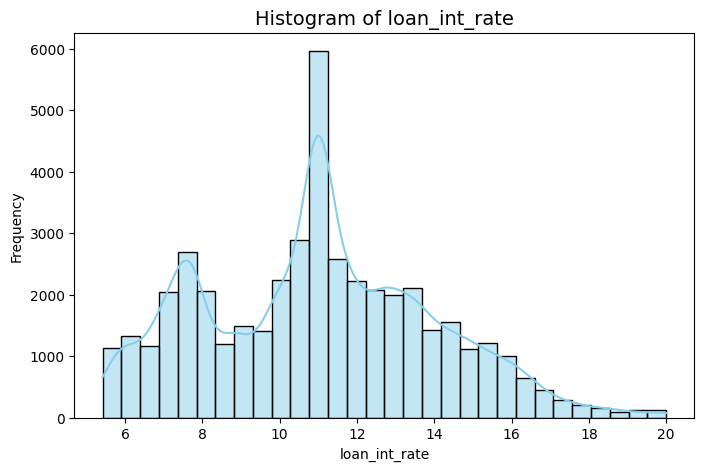

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['loan_int_rate'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of loan_int_rate', fontsize=14)
plt.xlabel('loan_int_rate')
plt.ylabel('Frequency')
plt.show()

# **loan_int_rate (Loan interest rate)**

**Description:**

 • The histogram shows the distribution of loan interest rates.

 • Most loans have moderate interest rates; a few loans have very low or high rates.

**What information it provides about the dataset:**

 • The variable loan_int_rate is numeric (continuous).

 • Extreme interest rate values may indicate data entry errors or exceptional loans.

**How this information helped to decide that the data needs preprocessing:**

 • Implausible values should be corrected or removed.

 • Normalization may be applied if required for modeling.

Five Number Summary for person_emp_exp:
min      0.0
25%      1.0
50%      4.0
75%      8.0
max    125.0
Name: person_emp_exp, dtype: float64
Outlier: 1724


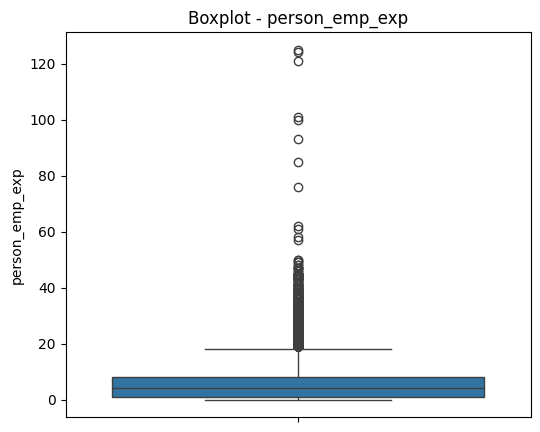

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/loan_data.csv")
print("Five Number Summary for person_emp_exp:")
print(df['person_emp_exp'].describe()[['min','25%','50%','75%','max']])

Q1 = df['person_emp_exp'].quantile(0.25)
Q3 = df['person_emp_exp'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['person_emp_exp'] < lower) | (df['person_emp_exp'] > upper)]
print("Outlier:", outliers['person_emp_exp'].count())

plt.figure(figsize=(6,5))
sns.boxplot(y=df['person_emp_exp'])
plt.title('Boxplot - person_emp_exp')
plt.show()


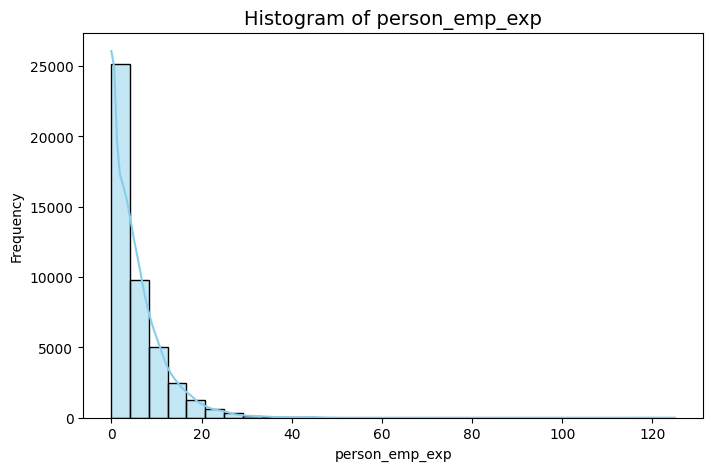

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['person_emp_exp'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of person_emp_exp', fontsize=14)
plt.xlabel('person_emp_exp')
plt.ylabel('Frequency')
plt.show()

# **person_emp_exp (Years of employment experience)**
**Description:**

 • The histogram shows the distribution of applicants’ years of employment experience.

 • Most individuals have 1–20 years of experience, while a few report extremely high values (>50 years).

**What information it provides about the dataset:**

• The variable person_emp_exp is numeric (continuous).

 • Extremely high values are likely unrealistic or erroneous.

**How this information helped to decide that the data needs preprocessing:**

•Handling outliers is necessary, either by correcting unrealistic values or removing them if they are invalid.

• Years of experience can also be categorized into defined groups (e.g., 0–5, 6–10, 11–20) to simplify analysis and reduce the impact of extreme values.


Five Number Summary for loan_percent_income:
min    0.00
25%    0.07
50%    0.12
75%    0.19
max    0.66
Name: loan_percent_income, dtype: float64
Outlier: 744


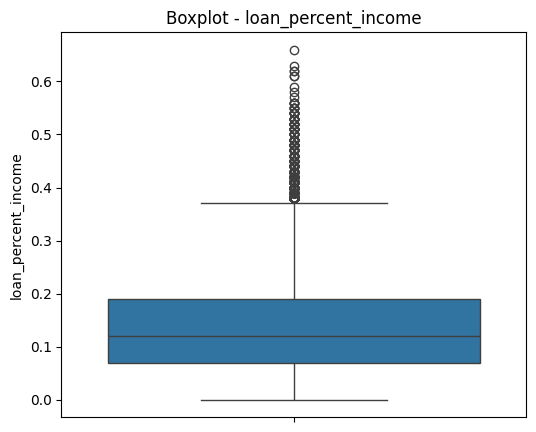

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/loan_data.csv")
print("Five Number Summary for loan_percent_income:")
print(df['loan_percent_income'].describe()[['min','25%','50%','75%','max']])

Q1 = df['loan_percent_income'].quantile(0.25)
Q3 = df['loan_percent_income'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['loan_percent_income'] < lower) | (df['loan_percent_income'] > upper)]
print("Outlier:", outliers['loan_percent_income'].count())

plt.figure(figsize=(6,5))
sns.boxplot(y=df['loan_percent_income'])
plt.title('Boxplot - loan_percent_income')
plt.show()

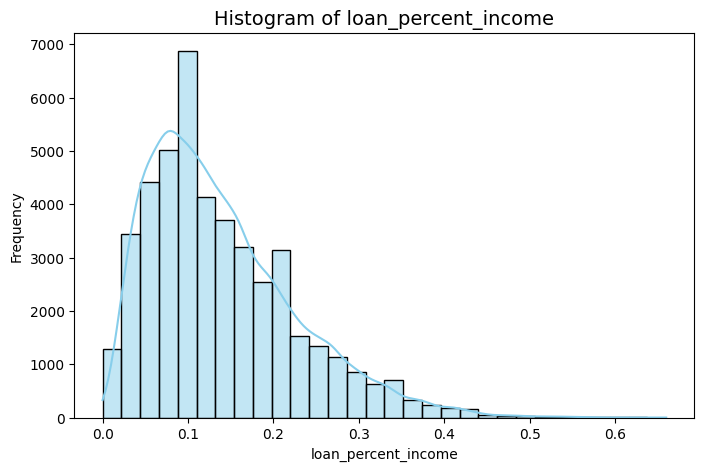

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['loan_percent_income'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of loan_percent_income', fontsize=14)
plt.xlabel('loan_percent_income')
plt.ylabel('Frequency')
plt.show()

# **loan_percent_income (Loan amount as a percentage of annual income)**
**Description:**

 • The histogram illustrates the distribution of loan amounts as a percentage of annual income.

 • Most values are below 50%, but a few extreme ratios exceed 100–200%

**What information it provides about the dataset:**

• The variable loan_percent_income is numeric (continuous).

 • Extremely high ratios suggest potential errors or exceptional cases.

**How this information helped to decide that the data needs preprocessing:**


 • Extreme values may need capping or correction.

 • Optionally, values can be categorized into low, medium, and high percentage bins.

Five Number Summary for cb_person_cred_hist_length:
min     2.0
25%     3.0
50%     4.0
75%     8.0
max    30.0
Name: cb_person_cred_hist_length, dtype: float64
outlier: 1366


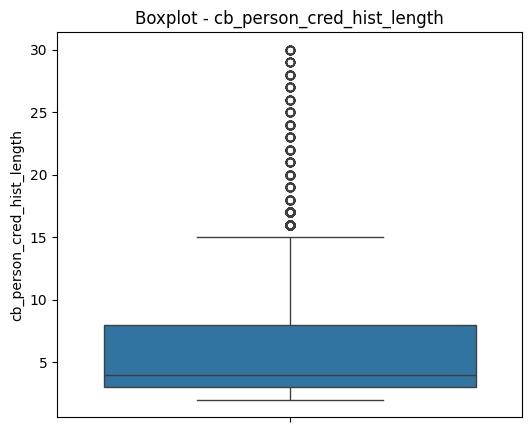

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/loan_data.csv")
print("Five Number Summary for cb_person_cred_hist_length:")
print(df['cb_person_cred_hist_length'].describe()[['min','25%','50%','75%','max']])

Q1 = df['cb_person_cred_hist_length'].quantile(0.25)
Q3 = df['cb_person_cred_hist_length'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['cb_person_cred_hist_length'] < lower) | (df['cb_person_cred_hist_length'] > upper)]
print("outlier:", outliers['cb_person_cred_hist_length'].count())

plt.figure(figsize=(6,5))
sns.boxplot(y=df['cb_person_cred_hist_length'])
plt.title('Boxplot - cb_person_cred_hist_length')
plt.show()

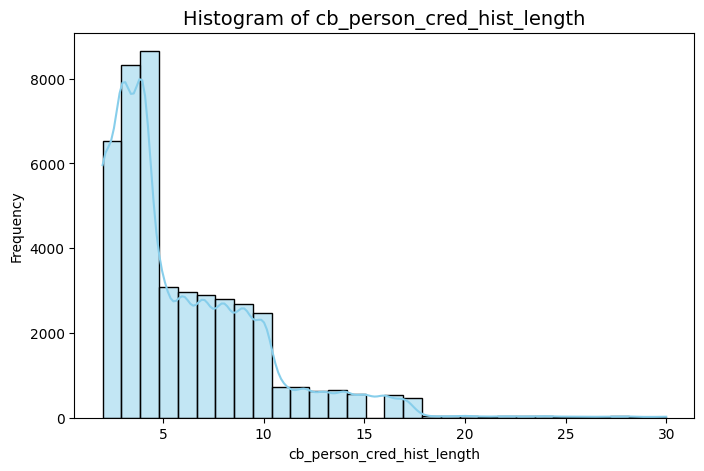

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['cb_person_cred_hist_length'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of cb_person_cred_hist_length', fontsize=14)
plt.xlabel('cb_person_cred_hist_length')
plt.ylabel('Frequency')
plt.show()

# **cb_person_cred_hist_length (Length of credit history in years)**

**Description:**

 • The histogram shows the distribution of the length of applicants’ credit histories.

 • Most individuals have 1–20 years, while a few report very long histories (>50 years)

**What information it provides about the dataset:**

 • The variable cb_person_cred_hist_length is numeric (continuous).

 • Extreme values indicate potential errors or data inconsistencies.

**How this information helped to decide that the data needs preprocessing:**


 • Handling extreme values or categorizing the credit history into ranges is recommended.

Five Number Summary for credit_score:
min    390.0
25%    601.0
50%    640.0
75%    670.0
max    850.0
Name: credit_score, dtype: float64
outlier: 467


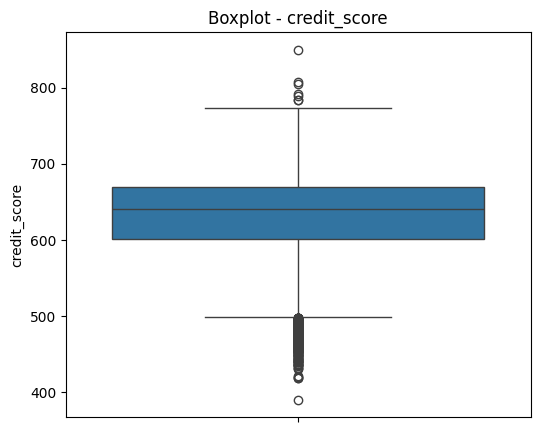

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/loan_data.csv")
print("Five Number Summary for credit_score:")
print(df['credit_score'].describe()[['min','25%','50%','75%','max']])

Q1 = df['credit_score'].quantile(0.25)
Q3 = df['credit_score'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['credit_score'] < lower) | (df['credit_score'] > upper)]
print("outlier:", outliers['credit_score'].count())

plt.figure(figsize=(6,5))
sns.boxplot(y=df['credit_score'])
plt.title('Boxplot - credit_score')
plt.show()


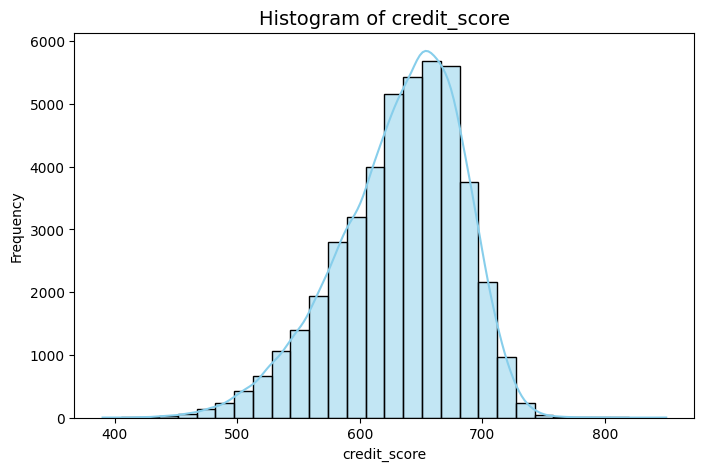

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['credit_score'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of credit_score', fontsize=14)
plt.xlabel('credit_score')
plt.ylabel('Frequency')
plt.show()

# **credit_score (Credit score of the person)**

**Description:**

 • The histogram displays the distribution of credit scores.

 • Most scores are between 500–750, with very few below 300 or above 850.

**What information it provides about the dataset:**

 • The variable credit_score is numeric (continuous).

 • Extreme values may indicate data entry errors.

 • Majority of scores fall in a reasonable range.

**How this information helped to decide that the data needs preprocessing:**

 • Implausible credit scores should be corrected or removed.

 • Optional normalization or categorization into low, medium, high bins may be applied.

# **Data Analysis:** Nominal attributes


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/loan_data.csv")


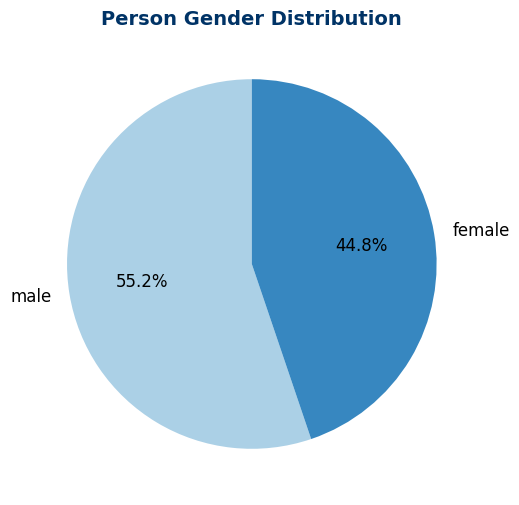

In [ ]:

colors = sns.color_palette("Blues", len(df['person_gender'].unique()))

plt.figure(figsize=(6,6))
df['person_gender'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12}
)
plt.title('Person Gender Distribution', fontsize=14, fontweight='bold', color='#003366')
plt.ylabel('')
plt.show()

# **person_gender(Gender of the person)**

 **Description:**


 • The pie chart represents the distribution of applicants based on gender.

 • Males constitute approximately 55.2% of the dataset, while females represent around 44.8%, showing a slight difference between the two groups.


 **What information it provides about the dataset:**


 • The variable person_gender is categorical / symmetric binary, containing only two distinct values : male and female.

 • The variable shows good data quality in terms of completeness and consistency, as there are no missing or inconsistent entries.

 • The distribution indicates a relatively balanced dataset with no severe class imbalance between the two genders.


 **How this information helped to decide that the data needs preprocessing:**


 • The attribute does not require data cleaning, as it contains no missing or noisy data.

 • The slight imbalance may be acceptable, but if gender strongly influences the target variable, balancing techniques could be applied to enhance model fairness.

/tmp/ipython-input-557070312.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


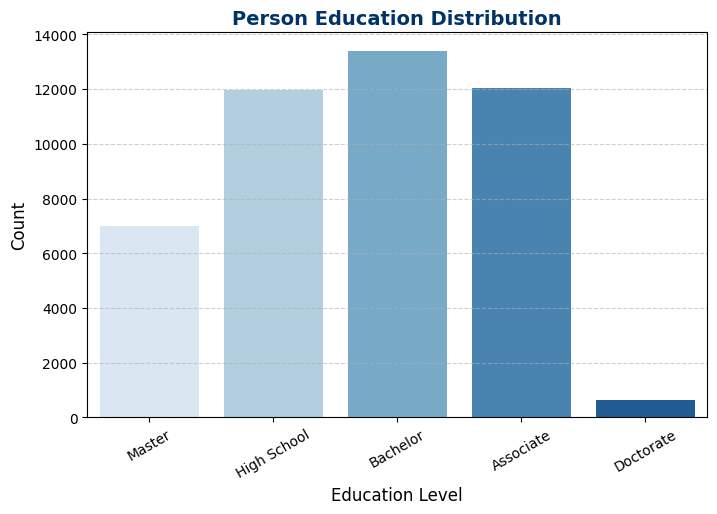

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/loan_data (1).csv")

plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x='person_education',
    palette='Blues'
)
plt.title('Person Education Distribution', fontsize=14, fontweight='bold', color='#003366')
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# **person_education (Highest education level)**

**Description:**

 • The bar chart shows the distribution of applicants according to their education levels, including High School, Associate, Bachelor, Master, and Doctorate.

 • The Bachelor category has the highest frequency, while Doctorate has the lowest, reflecting an unequal distribution among education levels.


**What information it provides about the dataset:**  

 • The variable person_education is categorical /ordinal , representing ordered educational stages.

 • The data are complete and accurate, as no missing, duplicate, or inconsistent values are observed.

 • However, the unequal bar heights reveal a data imbalance across education levels, which could affect analysis if the model is sensitive to class proportions.


**How this information helped to decide that the data needs preprocessing:**

 • Due to unequal frequencies, data reduction or balancing methods may be considered to mitigate potential bias.

 •The attribute does not require data cleaning but requires encoding (ordinal transformation), and scaling may be applied later depending on the algorithm used.

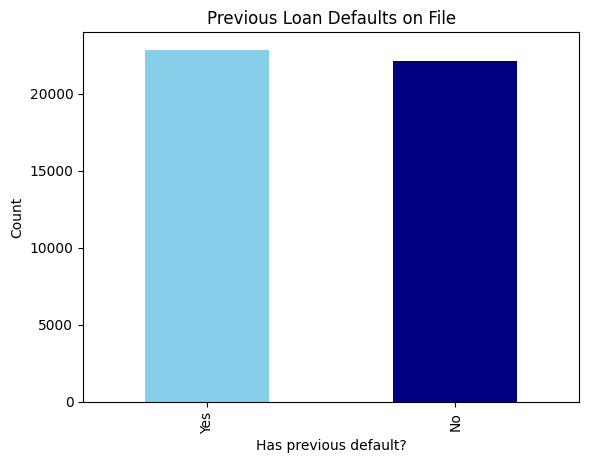

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("loan_data.csv")

df["previous_loan_defaults_on_file"].value_counts().plot(kind="bar", color=["skyblue", "navy"])

plt.title("Previous Loan Defaults on File")
plt.xlabel("Has previous default?")
plt.ylabel("Count")
plt.show()
print()

# **previous_loan_defaults_on_file (Indicator of previous loan defaults)**

**Description:**

• The bar plot provides a clear visualization of the distribution of applicants who have previously defaulted on a loan "Yes" versus those who haven't "No".

• Both bars are nearly equal in height, showing a balanced distribution between the two categories.

**What information it provides about the dataset:**

• The variable previous_loan_defaults_on_file is categorical (nominal) and contains two values ("Yes", "No").

• There are no missing or noisy values, which indicates data completeness and consistency, two key dimensions of data quality.

• The balanced distribution suggests that this feature does not introduce class imbalance issues.

**How this information helped deciding that data needs preprocessing:**

• Since the feature is categorical, it requires data transformation to convert text values into a numerical format.

• No data cleaning is needed because the attribute is already clean.

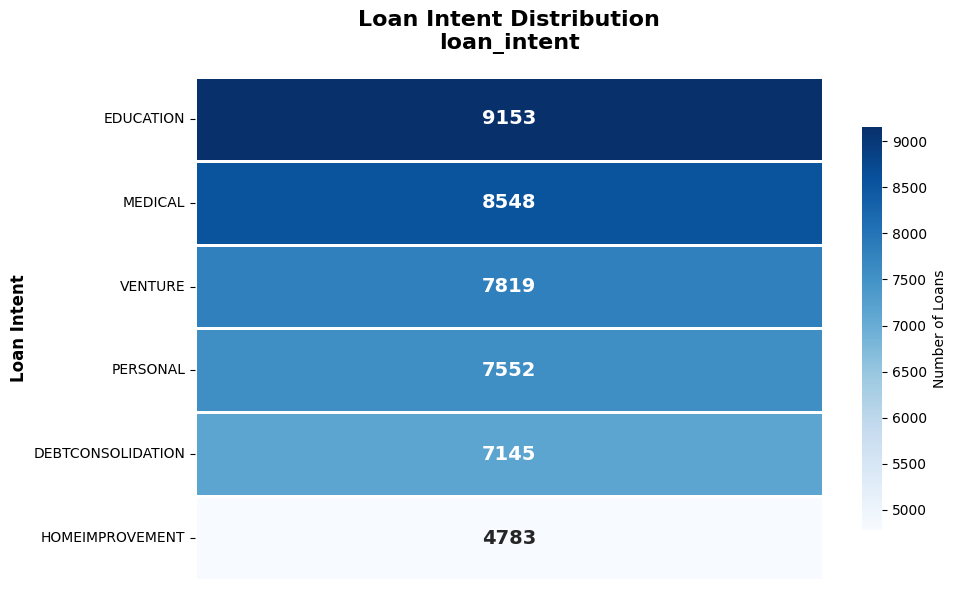

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("/content/loan_data (1)csv")
# Heatmap for LOAN INTENT
plt.figure(figsize=(10, 6))
intent_counts = df['loan_intent'].value_counts().sort_values(ascending=False)

sns.heatmap(intent_counts.values.reshape(-1, 1),
           annot=True,
           fmt='d',
           cmap='Blues',
           cbar_kws={'label': 'Number of Loans', 'shrink': 0.8},
           linewidths=2,
           linecolor='white',
           annot_kws={'fontsize': 14, 'fontweight': 'bold'})

plt.title('Loan Intent Distribution\nloan_intent',
         fontsize=16, fontweight='bold', pad=20)
plt.xlabel('')
plt.ylabel('Loan Intent', fontsize=12, fontweight='bold')
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], labels=intent_counts.index, rotation=0)
plt.xticks([])
plt.tight_layout()
plt.show()

# **Loan_Intent (Purpose of the loan)**

**Description**:

 • The bar plot provides a clear visualization of the distribution of applicants based on their loan intent categories — Education, Medical, Venture, Personal, Debt Consolidation, and Home Improvement.
 • The bars vary in height, showing that Education and Medical loans are the most common, while Home Improvement loans are the least frequent, indicating an unbalanced distribution.

**What information it provides about the dataset**:


 • The variable loan_intent is categorical (nominal) and contains six distinct values representing different loan purposes.
 • There are no missing or noisy values, which indicates good data completeness and consistency — two key dimensions of data quality.
 • The uneven bar heights reveal a class imbalance, meaning some loan intent categories are more represented than others.

**How this information helped to decide that the data needs preprocessing**:


 • Since the feature is categorical, it requires data transformation to convert text categories into numerical format (e.g., One-Hot Encoding).
 • Due to the imbalanced distribution, data reduction or balancing techniques such as oversampling or undersampling may be considered.
 • No data cleaning (missing value handling or noise smoothing) is needed because the attribute is already clean and consistent.

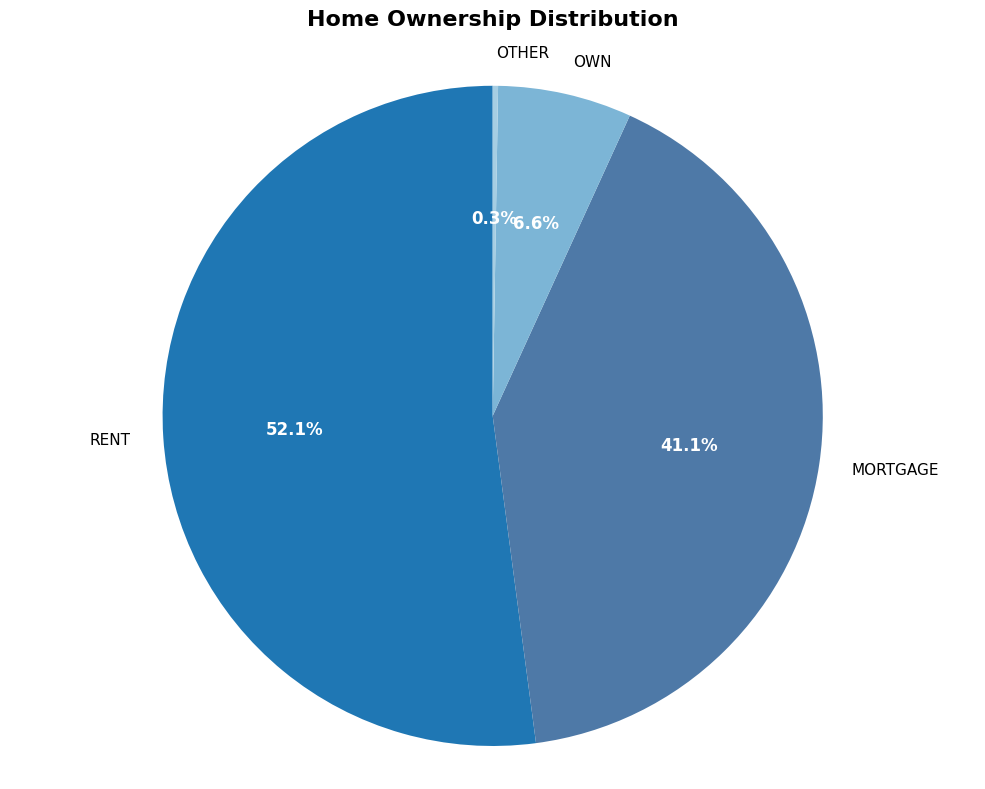

In [ ]:

plt.figure(figsize=(10, 8))
home_counts = df['person_home_ownership'].value_counts()

blue_colors = ['#1f77b4', '#4e79a7', '#7cb5d6', '#a6cee3', '#cee6f4']

wedges, texts, autotexts = plt.pie(home_counts.values,
                                  labels=home_counts.index,
                                  autopct='%1.1f%%',
                                  colors=blue_colors,
                                  startangle=90,
                                  textprops={'fontsize': 12})

plt.setp(autotexts, size=12, weight='bold', color='white')
plt.setp(texts, size=11)

plt.title('Home Ownership Distribution',
         fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()


# **person_home_ownership (Home Ownership)**

**Description**:

 • The pie chart provides a clear visualization of the distribution of applicants based on their home ownership status.

 • Most applicants are renters (52.1%), followed by those with a mortgage (41.1%), while a small percentage own their homes (6.6%) or fall under “Other” (0.3%).

**What information it provides about the dataset**:


 • The variable person_home_ownership is categorical (nominal) and contains four categories: “RENT,” “MORTGAGE,” “OWN,” and “OTHER.”

 • The distribution shows that the dataset is imbalanced, with “RENT” and “MORTGAGE” dominating the values.

 • There are no missing values, indicating good data completeness and consistency.

**How this information helped deciding that data needs preprocessing**:


 • Since the variable is categorical, it requires data transformation to convert the text values into numerical format (e.g., One-Hot Encoding).

 • The imbalance among categories suggests that encoding should be handled carefully to prevent dominant categories from biasing the model.

 • No additional cleaning or imputation is needed because the data is complete and consistent.

# **Missing values analysis**:

In [ ]:
import pandas as pd

df = pd.read_csv("loan_data.csv")
missing_values = df.isna().sum()

print("Missing values in each column:\n")
print(missing_values)

print("\nTotal number of missing values in the dataset:", missing_values.sum())

Missing values in each column:

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

Total number of missing values in the dataset: 0


# **Description of Missing values**


• The table displays the number of missing values in each column of the dataset, along with the total count of missing entries.

• This analysis helps assess the completeness of the data, which is a key aspect of data quality.

• If missing values are found, they indicate a need for data preprocessing steps such as imputation (replacing them with the mean, median, or mode) or, in some cases, removal of records with excessive missing data.

• In this dataset, if the total number of missing values is zero or minimal, it confirms that the dataset is complete and consistent, and no imputation is required.

# **Statistical Summary**:

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("loan_data.csv")


target_col = "loan_status" if "loan_status" in df.columns else None

numeric_cols = [c for c in df.select_dtypes(include=[np.number]).columns if c != target_col]

print(" Numeric columns:", numeric_cols)

numeric_summary = pd.DataFrame({
    "Count": df[numeric_cols].count(),
    "Mean": df[numeric_cols].mean().round(2),
    "Std Dev": df[numeric_cols].std().round(2),
    "Min": df[numeric_cols].min(),
    "Q1": df[numeric_cols].quantile(0.25),
    "Median": df[numeric_cols].median(),
    "Q3": df[numeric_cols].quantile(0.75),
    "Max": df[numeric_cols].max()
})

print("\n                         === Numeric Statistical Summary ===")
print(numeric_summary)


 Numeric columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

                         === Numeric Statistical Summary ===
                            Count      Mean   Std Dev      Min        Q1  \
person_age                  45000     27.76      6.05    20.00     24.00   
person_income               45000  80319.05  80422.50  8000.00  47204.00   
person_emp_exp              45000      5.41      6.06     0.00      1.00   
loan_amnt                   45000   9583.16   6314.89   500.00   5000.00   
loan_int_rate               45000     11.01      2.98     5.42      8.59   
loan_percent_income         45000      0.14      0.09     0.00      0.07   
cb_person_cred_hist_length  45000      5.87      3.88     2.00      3.00   
credit_score                45000    632.61     50.44   390.00    601.00   

                              Median        Q3         Max  
person_age               

# **Description of Statistical Summary**


• The table provides a statistical summary of all numeric attributes in the dataset, including measures of central tendency (Mean, Median) and data spread (Standard Deviation, Q1, Q3, Min, and Max).

• This summary helps identify data variability and potential outliers, especially when there are large gaps between Q1–Q3 or between the minimum and maximum values.

• It also shows whether features have different scales, indicating that normalization or standardization may be needed during preprocessing to ensure fair model performance.

# **[4] Data preprocessing**


# **Start of Data Preprocessing**

# **1.Remove Outliers: IQR method**

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('loan_data (1).csv')

def remove_outliers_iqr(df, columns):
    df_clean = df.copy()

    for column in columns:
        if df_clean[column].dtype in ['int64', 'float64']:
            Q1 = df_clean[column].quantile(0.25)
            Q3 = df_clean[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers_before = ((df_clean[column] < lower_bound) | (df_clean[column] > upper_bound)).sum()

            df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]

            print(f"Column: {column}")
            print(f"  - Outliers removed: {outliers_before}")
            print(f"  - Rows after removal: {len(df_clean)}")
            print(f"  - Range: [{lower_bound:.2f}, {upper_bound:.2f}]")
            print("-" * 50)

    return df_clean

numeric_columns = [
    'person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
    'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score'
]

print("Rows before outlier removal:", len(df))
print("=" * 60)

df_clean = remove_outliers_iqr(df, numeric_columns)

print(f"\nFinal Result:")
print(f"Rows before cleaning: {len(df)}")
print(f"Rows after cleaning: {len(df_clean)}")
print(f"Percentage removed: {((len(df) - len(df_clean)) / len(df) * 100):.2f}%")

df_clean.to_csv('loan_data_cleaned.csv', index=False)


print("\nStatistics after cleaning:")
print(df_clean[numeric_columns].describe())

Rows before outlier removal: 45000
Column: person_age
  - Outliers removed: 2188
  - Rows after removal: 42812
  - Range: [15.00, 39.00]
--------------------------------------------------
Column: person_income
  - Outliers removed: 2039
  - Rows after removal: 40773
  - Range: [-24891.25, 166756.75]
--------------------------------------------------
Column: person_emp_exp
  - Outliers removed: 472
  - Rows after removal: 40301
  - Range: [-8.00, 16.00]
--------------------------------------------------
Column: loan_amnt
  - Outliers removed: 1757
  - Rows after removal: 38544
  - Range: [-5500.00, 22500.00]
--------------------------------------------------
Column: loan_int_rate
  - Outliers removed: 77
  - Rows after removal: 38467
  - Range: [1.75, 19.71]
--------------------------------------------------
Column: loan_percent_income
  - Outliers removed: 1253
  - Rows after removal: 37214
  - Range: [-0.07, 0.33]
--------------------------------------------------
Column: cb_person_cr

**Technique Used:**

The Interquartile Range (IQR) method was applied to detect and remove outliers from the dataset’s numerical attributes.

**Why It Was Used:**

Outliers can distort statistical summaries and negatively impact the accuracy of analytical models. Removing them improves data consistency and reliability by ensuring that extreme or abnormal values do not bias the analysis.

**How It Was Used:**

For each numerical column, the first (Q1) and third (Q3) quartiles were calculated to determine the interquartile range (IQR = Q3 - Q1). Values falling outside the acceptable range were identified as outliers and excluded from the dataset.

**Applied On Attributes:**

person_age, person_income, person_emp_exp, loan_amnt, loan_int_rate, loan_percent_income, cb_person_cred_hist_length, and credit_score.

# **2.Normalize Numric data: Min-Max Scalling**

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("/content/loan_data_cleaned.csv")

scaler = MinMaxScaler()

columns_to_scale = ['person_income', 'loan_amnt']

print("===== Before Normalization =====\n")
print(df[columns_to_scale].head(5))

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

print("\n" + "="*35)
print("===== After Normalization =====")
print("="*35 + "\n")

print(df[columns_to_scale].head(5))

print("\n Normalization completed successfully for columns: person_income, loan_amnt")


df.to_csv("/content/loan_data_normalized.csv", index=False)


===== Before Normalization =====

   person_income  loan_amnt
0        12282.0     1000.0
1        12951.0     2500.0
2        12739.0     1600.0
3        14283.0     1750.0
4        13866.0     1500.0

===== After Normalization =====

   person_income  loan_amnt
0       0.026973   0.022727
1       0.031187   0.090909
2       0.029851   0.050000
3       0.039577   0.056818
4       0.036950   0.045455

 Normalization completed successfully for columns: person_income, loan_amnt


**Technique Used:**

Normalization using the Min-Max Scaling method.

**Why It Was Used:**

Normalization was applied to bring all numerical values into a common range and prevent variables with large magnitudes from dominating others. This ensures that all features contribute proportionally in later analysis or modeling.

**How It Was Used:**

The Min-Max Scaler transformed each selected attribute’s values to a range between 0 and 1 based on their minimum and maximum values within the dataset.

**Applied On Attributes**:

person_income and loan_amnt.

# **3.Encode Categorical Data: Label Encoding**

In [ ]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('/content/loan_data_normalized.csv')

categorical_columns = [
    'person_gender',
    'person_education',
    'person_home_ownership',
    'loan_intent',
    'previous_loan_defaults_on_file'
]

print("Original Categorical Values:")
print("=" * 50)


for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")


df_encoded = df.copy()


label_encoders = {}


print("\n" + "=" * 50)
print("ENCODING PROCESS")
print("=" * 50)

for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le


    print(f"\n{col} Encoding:")
    for i, class_name in enumerate(le.classes_):
        print(f"  {class_name} → {i}")


print("\n" + "=" * 50)
print("ENCODED DATASET (First 10 rows)")
print("=" * 50)
print(df_encoded[categorical_columns].head(10))

print("\n" + "=" * 50)
print("DATASET INFO")
print("=" * 50)
print(f"Original shape: {df.shape}")
print(f"Encoded shape: {df_encoded.shape}")
print(f"Columns after encoding: {list(df_encoded.columns)}")


df_encoded.to_csv('loan_data_encoded.csv', index=False)





Original Categorical Values:
person_gender: ['female' 'male']
person_education: ['High School' 'Master' 'Bachelor' 'Associate' 'Doctorate']
person_home_ownership: ['OWN' 'MORTGAGE' 'OTHER' 'RENT']
loan_intent: ['EDUCATION' 'VENTURE' 'PERSONAL' 'MEDICAL' 'DEBTCONSOLIDATION'
 'HOMEIMPROVEMENT']
previous_loan_defaults_on_file: ['Yes' 'No']

ENCODING PROCESS

person_gender Encoding:
  female → 0
  male → 1

person_education Encoding:
  Associate → 0
  Bachelor → 1
  Doctorate → 2
  High School → 3
  Master → 4

person_home_ownership Encoding:
  MORTGAGE → 0
  OTHER → 1
  OWN → 2
  RENT → 3

loan_intent Encoding:
  DEBTCONSOLIDATION → 0
  EDUCATION → 1
  HOMEIMPROVEMENT → 2
  MEDICAL → 3
  PERSONAL → 4
  VENTURE → 5

previous_loan_defaults_on_file Encoding:
  No → 0
  Yes → 1

ENCODED DATASET (First 10 rows)
   person_gender  person_education  person_home_ownership  loan_intent  \
0              0                 3                      2            1   
1              0                 3   

**Technique Used:**

Categorical Encoding using the Label Encoding technique.

**Why It Was Used:**

Machine learning algorithms typically require numerical inputs; therefore, categorical variables were encoded into numeric form to make them compatible with future analytical and modeling processes.

**How It Was Used:**

Each categorical column was processed using a label encoder, which assigned a unique integer to every distinct category within that column.

**Applied On Attributes:**

person_gender, person_education, person_home_ownership, loan_intent, and previous_loan_defaults_on_file.

**Preprocessing Results and Impact**

The preprocessing stage significantly enhanced the quality and usability of the dataset. Three main techniques were applied to ensure cleaner, more consistent.

	•	Outlier Removal:

Extreme values were detected and removed from the dataset, reducing the number of records from 45,000 to 36,000.
This step improved the reliability of statistical summaries and prevented the model from being biased by unusually large or small values.

	•	Normalization:

The attributes person_income and loan_amnt were normalized to bring their values into a comparable range.
This scaling ensured that differences in measurement units or numerical magnitude would not disproportionately influence model training or distance-based algorithms.

	•	Categorical Encoding:

All five categorical attributes were transformed using "Label Encoding" to convert non numeric variables into a machine readable format.
This improved model interpretability and allowed the algorithm to recognize each category distinctly without implying any ordinal relationship.

**Overall**, these preprocessing steps improved data quality, consistency, and comparability across features, establishing a solid foundation for accurate and fair model training.

# **Snapshot of the raw dataset and data after preprocessing**

# **Raw dataset**

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("loan_data.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("loan_data.csv")


target_col = "loan_status" if "loan_status" in df.columns else None

numeric_cols = [c for c in df.select_dtypes(include=[np.number]).columns if c != target_col]

print(" Numeric columns:", numeric_cols)

numeric_summary = pd.DataFrame({
    "Count": df[numeric_cols].count(),
    "Mean": df[numeric_cols].mean().round(2),
    "Std Dev": df[numeric_cols].std().round(2),
    "Min": df[numeric_cols].min(),
    "Q1": df[numeric_cols].quantile(0.25),
    "Median": df[numeric_cols].median(),
    "Q3": df[numeric_cols].quantile(0.75),
    "Max": df[numeric_cols].max()
})

print("\n === Numeric Statistical Summary for the data before preprocessing===")
print(numeric_summary)


 Numeric columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

 === Numeric Statistical Summary for the data before preprocessing===
                            Count      Mean   Std Dev      Min        Q1  \
person_age                  45000     27.76      6.05    20.00     24.00   
person_income               45000  80319.05  80422.50  8000.00  47204.00   
person_emp_exp              45000      5.41      6.06     0.00      1.00   
loan_amnt                   45000   9583.16   6314.89   500.00   5000.00   
loan_int_rate               45000     11.01      2.98     5.42      8.59   
loan_percent_income         45000      0.14      0.09     0.00      0.07   
cb_person_cred_hist_length  45000      5.87      3.88     2.00      3.00   
credit_score                45000    632.61     50.44   390.00    601.00   

                              Median        Q3         Max  
person_age      

# **Data after preprocessing:**

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/Preprocessed_dataset.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,21,0,3,0.026973,0,2,0.022727,1,11.14,0.08,2,504,1,0
1,21,0,3,0.031187,0,2,0.090909,5,7.14,0.19,2,532,0,1
2,21,0,3,0.029851,0,2,0.050000,5,14.74,0.13,3,640,0,1
3,24,0,4,0.039577,1,0,0.056818,1,10.99,0.12,2,679,0,1
4,24,0,1,0.036950,0,2,0.045455,4,7.29,0.11,3,600,1,0


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/loan_data_encoded.csv")


target_col = "loan_status" if "loan_status" in df.columns else None

numeric_cols = [c for c in df.select_dtypes(include=[np.number]).columns if c != target_col]

print(" Numeric columns:", numeric_cols)

numeric_summary = pd.DataFrame({
    "Count": df[numeric_cols].count(),
    "Mean": df[numeric_cols].mean().round(2),
    "Std Dev": df[numeric_cols].std().round(2),
    "Min": df[numeric_cols].min(),
    "Q1": df[numeric_cols].quantile(0.25),
    "Median": df[numeric_cols].median(),
    "Q3": df[numeric_cols].quantile(0.75),
    "Max": df[numeric_cols].max()
})

print("\n  === Numeric Statistical Summary of the data after preprocessing ===")
print(numeric_summary)


 Numeric columns: ['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file']

  === Numeric Statistical Summary of the data after preprocessing ===
                                Count    Mean  Std Dev     Min          Q1  \
person_age                      36065   26.40     3.87   20.00   23.000000   
person_gender                   36065    0.55     0.50    0.00    0.000000   
person_education                36065    1.75     1.48    0.00    0.000000   
person_income                   36065    0.39     0.20    0.00    0.242249   
person_emp_exp                  36065    4.07     3.88    0.00    1.000000   
person_home_ownership           36065    1.76     1.43    0.00    0.000000   
loan_amnt                       36065    0.35     0.22    0.00    0.195455   
loan_intent                

# **[5] Data Mining Techniques**

In our project, two main data mining techniques will be applied: classification and clustering.

**1. Classification**

The classification technique will be used to predict a target class based on the attributes available in the dataset. This approach is appropriate because the dataset contains a predefined label that can be used for supervised learning. For this purpose, the Decision Tree algorithm will be applied due to its interpretability and its ability to handle different data types.
The implementation will be done in Python using the scikit-learn library, specifically the following methods:
 • train_test_split for dividing the data into training and testing sets.
 • DecisionTreeClassifier for building the classification model.
 • confusion_matrix and accuracy_score for performance evaluation.
These tools will help measure how accurately the model predicts the target class and provide insights through its confusion matrix.

**2. Clustering**

Clustering will be used to discover natural groupings within the dataset without relying on predefined labels. This makes it suitable for exploring customer behavior patterns, product groups, or any underlying structures in the data. The K-Means algorithm is selected because it is efficient, widely used, and performs well with numerical datasets.
The technique will be implemented in Python using the K-Means method from the scikit-learn library. The algorithm will assign each record to one of the clusters based on similarity, enabling a deeper understanding of hidden patterns within the data.

# **[6] Evaluation and Comparison**

# **Classification**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

# Suppress warnings related to zero division in classification report
warnings.filterwarnings('ignore')

# Function to Display Confusion Matrix
def display_confusion_matrix(y_test, y_pred, title):
    """Calculates and plots the confusion matrix."""
    cm = confusion_matrix(y_test, y_pred)

    # Plotting the confusion matrix for better visualization
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'{title}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

    print(f"Confusion Matrix for {title}:\n{cm}")
    print("-" * 30)

# Load the preprocessed dataset
file_path = '/content/Preprocessed_dataset.csv'
df = pd.read_csv(file_path)

# Define the target variable and features
TARGET_VARIABLE = 'loan_status'
FEATURES = df.drop(columns=[TARGET_VARIABLE]).columns.tolist()

X = df[FEATURES]
y = df[TARGET_VARIABLE]

print(f"Number of Features Used: {len(FEATURES)}")
print(f"Target Variable: {TARGET_VARIABLE}")
print(f"Dataset Shape: {df.shape}")

Number of Features Used: 13
Target Variable: loan_status
Dataset Shape: (36065, 14)


--- Decision Tree Classifier (Criterion: GINI) ---

Partition Size (Train/Test): 70/30
Model Accuracy: 0.8886
Weighted Avg F1-Score: 0.8893


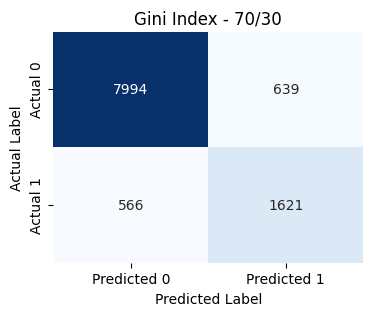

Confusion Matrix for Gini Index - 70/30:
[[7994  639]
 [ 566 1621]]
------------------------------

Partition Size (Train/Test): 80/20
Model Accuracy: 0.8949
Weighted Avg F1-Score: 0.8958


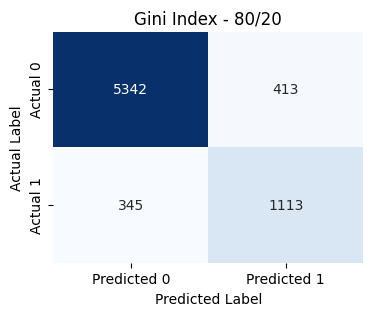

Confusion Matrix for Gini Index - 80/20:
[[5342  413]
 [ 345 1113]]
------------------------------

Partition Size (Train/Test): 60/40
Model Accuracy: 0.8925
Weighted Avg F1-Score: 0.8930


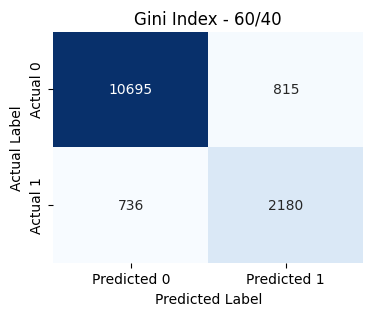

Confusion Matrix for Gini Index - 60/40:
[[10695   815]
 [  736  2180]]
------------------------------


In [ ]:
# Partition sizes for training (70%, 80%, 60%)
partition_sizes = [0.7, 0.8, 0.6]
criterion_name = "gini"
results_gini = {}

print(f"--- Decision Tree Classifier (Criterion: {criterion_name.upper()}) ---")

for train_size in partition_sizes:
    test_size = round(1 - train_size, 2)
    split_label = f'{int(train_size*100)}/{int(test_size*100)}'

    # Split the data (using stratify to maintain class balance)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    # Build the model
    dt_classifier = DecisionTreeClassifier(criterion=criterion_name, random_state=42)
    dt_classifier.fit(X_train, y_train)

    # Predict and Evaluate
    y_pred = dt_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Store results
    results_gini[split_label] = {
        'accuracy': accuracy,
        'report': report,
        'model': dt_classifier,
        'y_test': y_test,
        'y_pred': y_pred
    }

    print(f"\nPartition Size (Train/Test): {split_label}")
    print(f"Model Accuracy: {accuracy:.4f}")
    print(f"Weighted Avg F1-Score: {report['weighted avg']['f1-score']:.4f}")

    # Display Confusion Matrix
    display_confusion_matrix(y_test, y_pred, f"Gini Index - {split_label}")

--- Decision Tree Classifier (Criterion: ENTROPY) ---

Partition Size (Train/Test): 70/30
Model Accuracy: 0.8877
Weighted Avg F1-Score: 0.8889


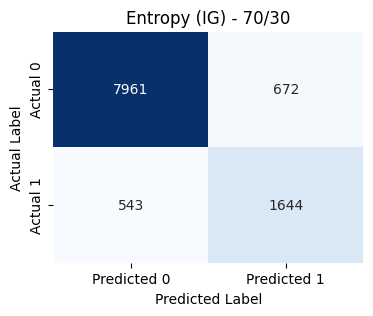

Confusion Matrix for Entropy (IG) - 70/30:
[[7961  672]
 [ 543 1644]]
------------------------------

Partition Size (Train/Test): 80/20
Model Accuracy: 0.8987
Weighted Avg F1-Score: 0.8994


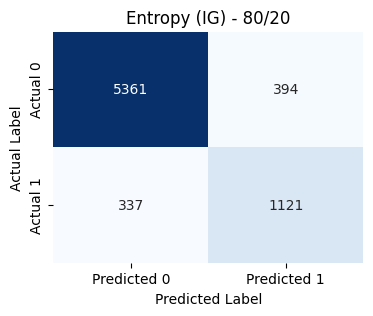

Confusion Matrix for Entropy (IG) - 80/20:
[[5361  394]
 [ 337 1121]]
------------------------------

Partition Size (Train/Test): 60/40
Model Accuracy: 0.8958
Weighted Avg F1-Score: 0.8959


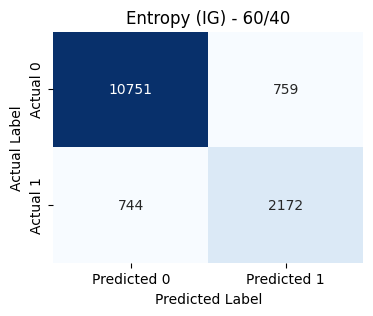

Confusion Matrix for Entropy (IG) - 60/40:
[[10751   759]
 [  744  2172]]
------------------------------


In [ ]:
# Use the same partition sizes for comparison
partition_sizes = [0.7, 0.8, 0.6]
criterion_name = "entropy"
results_entropy = {}

print(f"--- Decision Tree Classifier (Criterion: {criterion_name.upper()}) ---")

for train_size in partition_sizes:
    test_size = round(1 - train_size, 2)
    split_label = f'{int(train_size*100)}/{int(test_size*100)}'

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    # Build the model
    dt_classifier = DecisionTreeClassifier(criterion=criterion_name, random_state=42)
    dt_classifier.fit(X_train, y_train)

    # Predict and Evaluate
    y_pred = dt_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Store results
    results_entropy[split_label] = {
        'accuracy': accuracy,
        'report': report,
        'model': dt_classifier,
        'y_test': y_test,
        'y_pred': y_pred
    }

    print(f"\nPartition Size (Train/Test): {split_label}")
    print(f"Model Accuracy: {accuracy:.4f}")
    print(f"Weighted Avg F1-Score: {report['weighted avg']['f1-score']:.4f}")

    # Display Confusion Matrix
    display_confusion_matrix(y_test, y_pred, f"Entropy (IG) - {split_label}")

--- Accuracy Comparison Table for All Models ---
| Criterion    | Split   |   Accuracy |
|:-------------|:--------|-----------:|
| Entropy (IG) | 80/20   |     0.8987 |
| Entropy (IG) | 60/40   |     0.8958 |
| Gini Index   | 80/20   |     0.8949 |
| Gini Index   | 60/40   |     0.8925 |
| Gini Index   | 70/30   |     0.8886 |
| Entropy (IG) | 70/30   |     0.8877 |


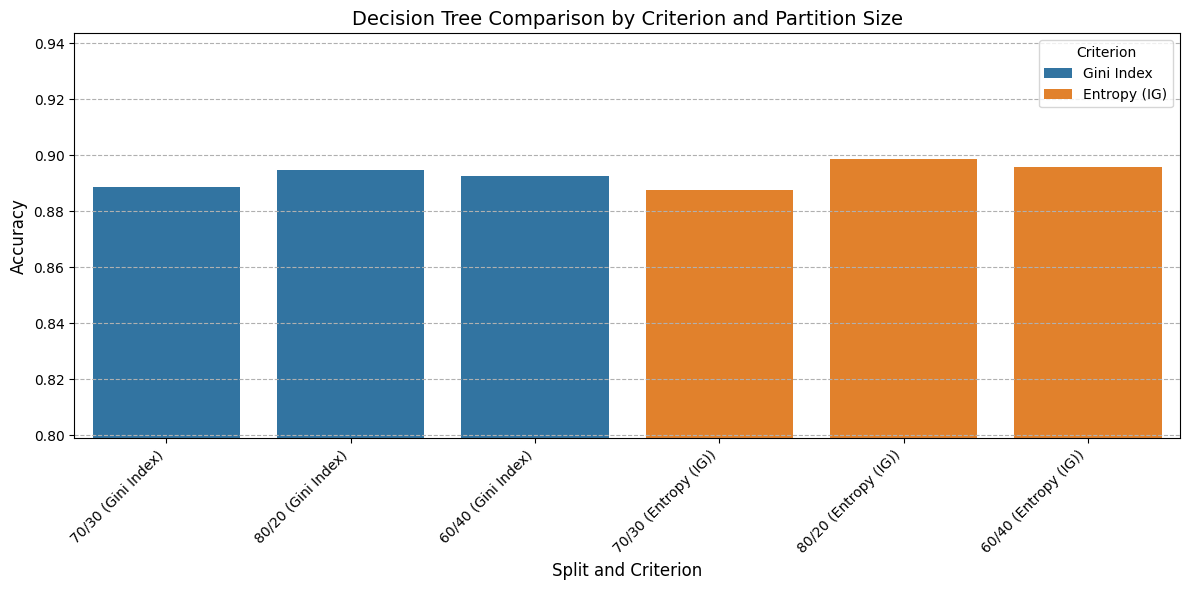


Note: The highest accuracy of 0.8987 was achieved using the Entropy (IG) criterion with a 80/20 split.


In [ ]:
# Aggregate all results for comparison
comparison_data = []
for split, res in results_gini.items():
    comparison_data.append({
        'Criterion': 'Gini Index',
        'Split': split,
        'Accuracy': res['accuracy']
    })
for split, res in results_entropy.items():
    comparison_data.append({
        'Criterion': 'Entropy (IG)',
        'Split': split,
        'Accuracy': res['accuracy']
    })

comparison_df = pd.DataFrame(comparison_data)

print("--- Accuracy Comparison Table for All Models ---")
print(comparison_df.sort_values(by='Accuracy', ascending=False).to_markdown(index=False, floatfmt=".4f"))

# Identify the best model for visualization
best_row = comparison_df.loc[comparison_df['Accuracy'].idxmax()]
best_criterion = best_row['Criterion']
best_split = best_row['Split']
best_key = best_split

if best_criterion == 'Gini Index':
    best_results = results_gini[best_key]
else:
    best_results = results_entropy[best_key]

# Create the Bar Plot (Visualization)
plt.figure(figsize=(12, 6))
sns.barplot(
    x=comparison_df['Split'] + ' (' + comparison_df['Criterion'] + ')',
    y=comparison_df['Accuracy'],
    hue=comparison_df['Criterion'],
    dodge=False
)

plt.title('Decision Tree Comparison by Criterion and Partition Size', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Split and Criterion', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.ylim(comparison_df['Accuracy'].min() * 0.9, comparison_df['Accuracy'].max() * 1.05)
plt.tight_layout()
plt.show()

print(f"\nNote: The highest accuracy of {best_row['Accuracy']:.4f} was achieved using the {best_criterion} criterion with a {best_split} split.")

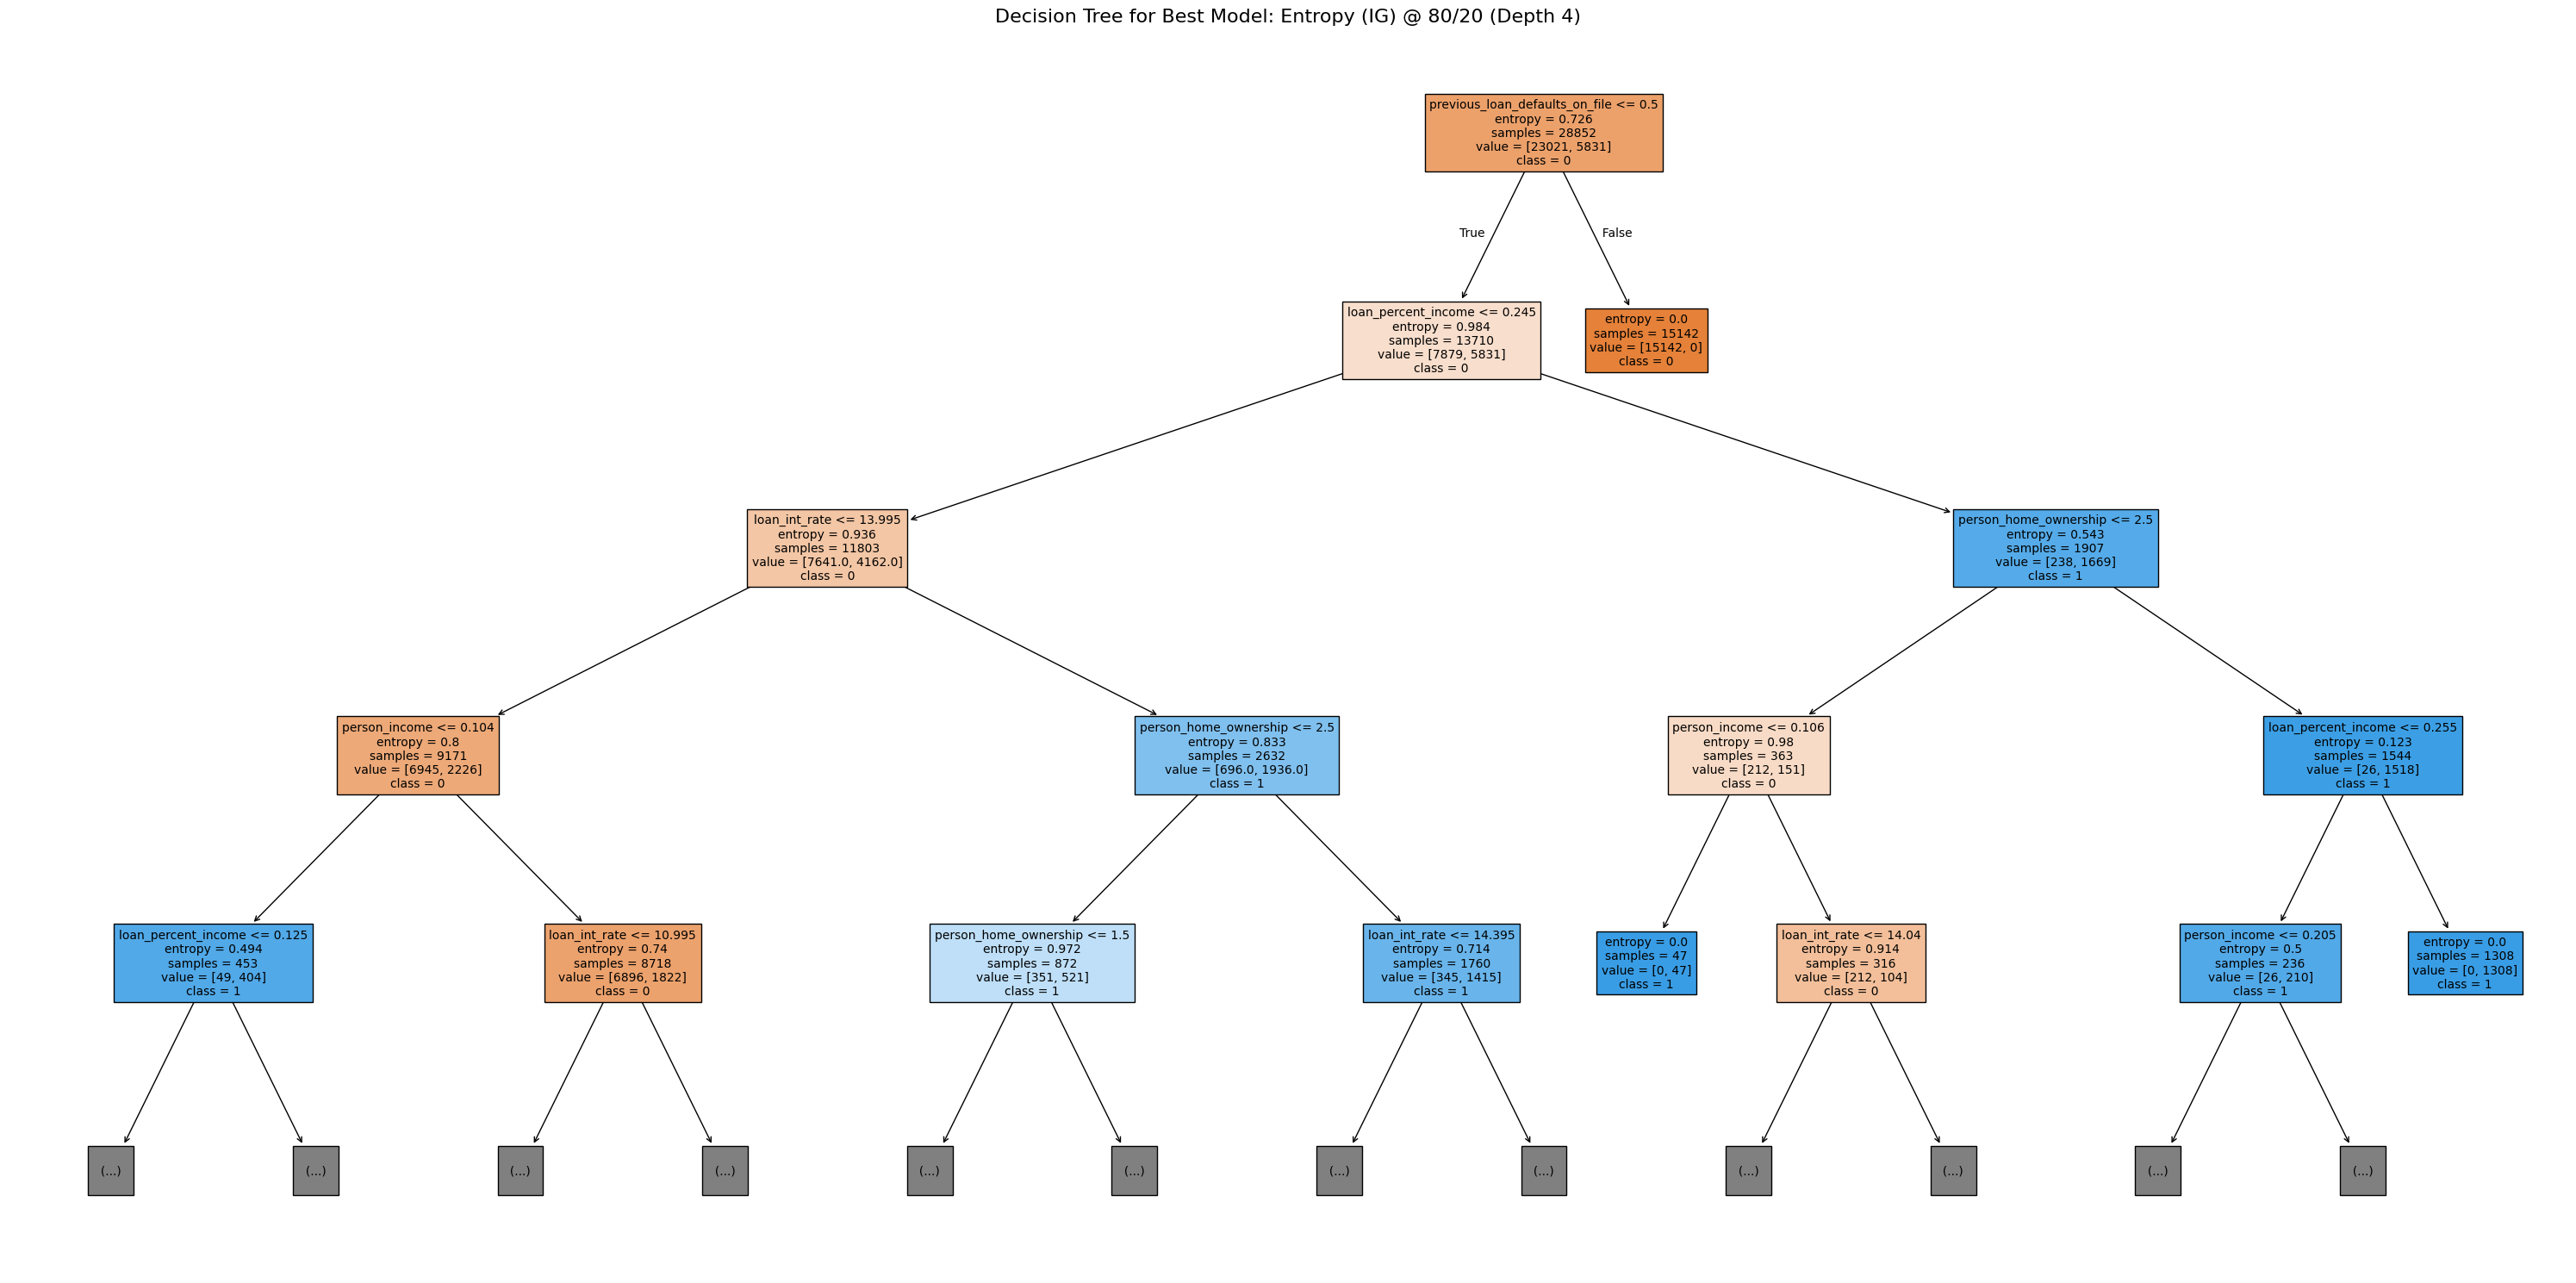

In [ ]:
# Plot the Decision Tree for the best-performing model (for visual interpretation)
# max_depth is limited to ensure the plot is readable
plt.figure(figsize=(30, 15))

# Class names (assuming 0 and 1 based on the binary target variable)
class_names = [str(c) for c in best_results['model'].classes_]

plot_tree(best_results['model'],
          feature_names=FEATURES,
          class_names=class_names,
          filled=True,
          max_depth=4, # Depth limited to 4 for interpretability
          fontsize=10)

plt.title(f"Decision Tree for Best Model: {best_criterion} @ {best_split} (Depth 4)", fontsize=16)
plt.tight_layout()
plt.show()

# **Classification Results: Decision Tree (Gini vs. Entropy)**

This section presents a comparative analysis of the Decision Tree classifier using two attribute selection measures: Gini Index and Information Gain (Entropy). The evaluation was conducted across three different train–test partitions: 80/20, 70/30 and 60/40. For each configuration, accuracy and confusion matrices were reported to assess model performance.

# **1. Performance Comparison Across Partition Sizes**

# **1.1 80% Training  20% Testing**

**Gini Index**

Accuracy: 0.8949

**Confusion Matrix:**

[[5342, 413],

 [ 345, 1113]]

**Entropy (Information Gain)**

Accuracy: 0.8987

**Confusion Matrix:**

[[5361, 394],

 [ 337, 1121]]


Entropy again slightly outperforms Gini.

It demonstrates better generalization, producing fewer misclassifications across both classes.

**Best algorithm for 80/20: Entropy**

#**1.2 70% Training 30% Testing**

**Gini Index**

Accuracy: 0.8886

**Confusion Matrix:**

[[7994, 639],

 [ 566, 1621]]

**Entropy (Information Gain)**

Accuracy: 0.8877

**Confusion Matrix:**

[[7961, 672],

 [ 543, 1644]]


In this configuration, Gini performs slightly better.

Gini achieves lower false positives compared to Entropy.

**Best algorithm for 70/30: Gini**

# **1.3 60% Training 40% Testing**
**Gini Index**

Accuracy: 0.8925

**Confusion Matrix:**

[[10695, 815],

 [ 736, 2180]]

**Entropy (Information Gain)**

Accuracy: 0.8958

**Confusion Matrix:**

[[10751, 759],

 [ 744, 2172]]


In this configuration, Gini performs slightly better.

Gini achieves lower false positives compared to Entropy.

**Best algorithm for 60/40: Entropy**


# **2. Summary Table**



| Partition Size | Gini Accuracy | Entropy Accuracy | Best    |
| -------------- | ------------- | ---------------- | ------- |
| **80/20**      | 0.8949        | **0.8987**       | Entropy |
| **70/30**      | **0.8886**    | 0.8877           | Gini    |
| **60/40**      | 0.8925        | **0.8958**       | Entropy |


# **3. Interpretation and Discussion**
**3.1. Which attribute selection measure performs best per partition?**

Entropy performs best for the 80/20 and 60/40 partitions.

Gini performs best for the 70/30 partition.

**3.2. Which method performs best overall?**

Overall, Entropy (Information Gain) demonstrates superior performance because:

It yields the highest accuracy in two out of three partition scenarios.

It achieves the highest accuracy overall (0.8987 using the 80/20 split).

It consistently reduces misclassification in both majority and minority classes.

**3.3 Conclusion**

The analysis demonstrates that Entropy-based Decision Trees generally provide better classification performance across different train–test splits. The 80/20 partition using Entropy achieves the highest overall accuracy and offers the most balanced confusion matrix.
Although Gini performs slightly better in the 70/30 configuration, Entropy is the strongest overall performer in this study

# **Clustering**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from yellowbrick.cluster import SilhouetteVisualizer
import seaborn as sns


#read data
df = pd.read_csv("Preprocessed_dataset.csv")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36065 entries, 0 to 36064
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      36065 non-null  int64  
 1   person_gender                   36065 non-null  int64  
 2   person_education                36065 non-null  int64  
 3   person_income                   36065 non-null  float64
 4   person_emp_exp                  36065 non-null  int64  
 5   person_home_ownership           36065 non-null  int64  
 6   loan_amnt                       36065 non-null  float64
 7   loan_intent                     36065 non-null  int64  
 8   loan_int_rate                   36065 non-null  float64
 9   loan_percent_income             36065 non-null  float64
 10  cb_person_cred_hist_length      36065 non-null  int64  
 11  credit_score                    36065 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Extract the features (excluding the target variable)
features = df.drop("loan_status", axis=1)

# Use StandardScaler to scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create a new DataFrame with the scaled features
Loans_scaled = pd.DataFrame(scaled_features, columns=features.columns)

# Display the scaled DataFrame
print("\nScaled DataFrame:")
print(Loans_scaled.head())


Scaled DataFrame:
   person_age  person_gender  person_education  person_income  person_emp_exp  \
0   -1.397526      -1.099754          0.845885      -1.830558       -1.049912   
1   -1.397526      -1.099754          0.845885      -1.809362       -1.049912   
2   -1.397526      -1.099754          0.845885      -1.816079       -1.049912   
3   -0.621788      -1.099754          1.521502      -1.767160       -0.792046   
4   -0.621788      -1.099754         -0.505350      -1.780372       -1.049912   

   person_home_ownership  loan_amnt  loan_intent  loan_int_rate  \
0               0.170807  -1.521531    -0.878892       0.088362   
1               0.170807  -1.207867     1.437819      -1.277781   
2               0.170807  -1.396065     1.437819       1.317892   
3              -1.225258  -1.364699    -0.878892       0.037132   
4               0.170807  -1.416976     0.858642      -1.226551   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0            -0.694715 


Elbow Method 
Calculating WSS for each K...
K=1: WSS=468845.00
K=2: WSS=395553.09
K=3: WSS=367188.42
K=4: WSS=345493.31
K=5: WSS=332954.13
K=6: WSS=321180.28
K=7: WSS=312547.78
K=8: WSS=302283.31
K=9: WSS=297201.29
K=10: WSS=291166.20

🎯 Elbow automatically detected at K = 4


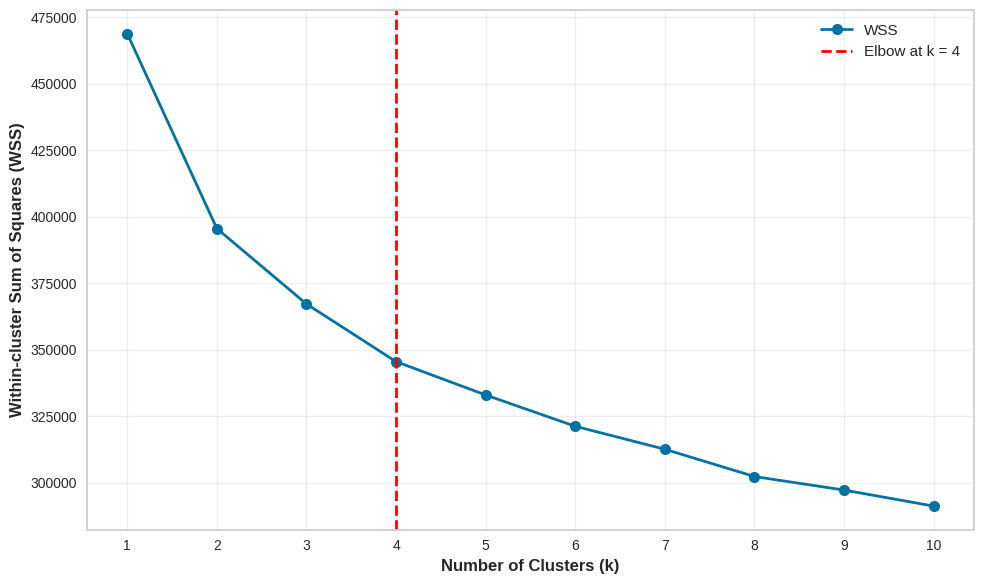


✓ Elbow Method completed


In [ ]:
# =============================================================================
# 11. Elbow Method with Automatic Elbow Detection
# =============================================================================
print("\n" + "="*70)
print("Elbow Method ")
print("="*70)

# Install kneed library (run once)
%pip install kneed

from kneed import KneeLocator

# Perform k-means clustering for different values of k
wss_values = []
k_values = range(1, 11)

print("Calculating WSS for each K...")
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Loans_scaled)
    wss_values.append(kmeans.inertia_)
    print(f"K={k}: WSS={kmeans.inertia_:.2f}")

# Automatically detect the elbow point
kneedle = KneeLocator(
    k_values,
    wss_values,
    curve='convex',
    direction='decreasing'
)

elbow_point = kneedle.elbow

print(f"\n🎯 Elbow automatically detected at K = {elbow_point}")

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(k_values, wss_values, 'bo-', linewidth=2, markersize=8, label='WSS')
plt.xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
plt.ylabel('Within-cluster Sum of Squares (WSS)', fontsize=12, fontweight='bold')

# Mark the elbow point automatically
if elbow_point is not None:
    plt.axvline(x=elbow_point, linestyle='--', color='red', linewidth=2,
                label=f'Elbow at k = {elbow_point}')

else:
    print("⚠️ No clear elbow detected")

plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.tight_layout()
plt.show()

print(f"\n✓ Elbow Method completed")


Why K = 4 Is the Elbow Point

Based on the Elbow Method plot, the Within-Cluster Sum of Squares (WSS) decreases rapidly from K = 1 to K = 4. After K = 4, the curve begins to flatten, meaning that adding more clusters results in only a very small reduction in WSS.
This indicates that K = 4 is the elbow point, where the improvement becomes marginal. Therefore, K = 4 is identified as the optimal number of clusters by the Elbow Method.



Why We Also Tested K = 3 and K = 5

Even though the Elbow Method suggested that K = 4 is optimal, it is still necessary to test K = 3 and K = 5 for comparison. This is important because clustering evaluation should not rely on only one metric.

 Why K = 3 was tested

We tested K = 3 because it is immediately before the elbow point.
Testing a value slightly smaller than the elbow helps us check if fewer clusters can still provide good separation or if the model becomes simpler while maintaining acceptable performance.

 Why K = 5 was tested

We tested K = 5 because it is immediately after the elbow point.
Testing a value slightly larger than the elbow helps us check Whether adding one additional cluster improves the clustering quality.

In [ ]:

# -----------------------------------------------------------------------------
# K-means  K=3
# -----------------------------------------------------------------------------
print("\n" + "="*70)
print("K = 3")
print("="*70)

# Set a seed for random number generation
np.random.seed(42)

# Run k-means clustering with 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_result_3 = kmeans_3.fit(Loans_scaled)

# Print the clustering result
print("Cluster Centers:")
print(kmeans_result_3.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result_3.labels_)

# Calculate metrics
silhouette_3 = silhouette_score(Loans_scaled, kmeans_result_3.labels_)
calinski_3 = calinski_harabasz_score(Loans_scaled, kmeans_result_3.labels_)
inertia_3 = kmeans_result_3.inertia_

print(f"\nSilhouette Score: {silhouette_3:.4f}")
print(f"Calinski-Harabasz Index: {calinski_3:.2f}")
print(f"Within-Cluster Sum of Squares: {inertia_3:.2f}")

# -----------------------------------------------------------------------------
# K-means  K=4
# -----------------------------------------------------------------------------
print("\n" + "="*70)
print("K = 4")
print("="*70)

# Set a seed for random number generation
np.random.seed(42)

# Run k-means clustering with 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=42)
kmeans_result_4 = kmeans_4.fit(Loans_scaled)

# Print the clustering result
print("Cluster Centers:")
print(kmeans_result_4.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result_4.labels_)

# Calculate metrics
silhouette_4 = silhouette_score(Loans_scaled, kmeans_result_4.labels_)
calinski_4 = calinski_harabasz_score(Loans_scaled, kmeans_result_4.labels_)
inertia_4 = kmeans_result_4.inertia_

print(f"\nSilhouette Score: {silhouette_4:.4f}")
print(f"Calinski-Harabasz Index: {calinski_4:.2f}")
print(f"Within-Cluster Sum of Squares: {inertia_4:.2f}")

# -----------------------------------------------------------------------------
# K-means  K=5
# -----------------------------------------------------------------------------
print("\n" + "="*70)
print("K = 5")
print("="*70)

# Set a seed for random number generation
np.random.seed(42)

# Run k-means clustering with 5 clusters
kmeans_5 = KMeans(n_clusters=5, random_state=42)
kmeans_result_5 = kmeans_5.fit(Loans_scaled)

# Print the clustering result
print("Cluster Centers:")
print(kmeans_result_5.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result_5.labels_)

# Calculate metrics
silhouette_5 = silhouette_score(Loans_scaled, kmeans_result_5.labels_)
calinski_5 = calinski_harabasz_score(Loans_scaled, kmeans_result_5.labels_)
inertia_5 = kmeans_result_5.inertia_

print(f"\nSilhouette Score: {silhouette_5:.4f}")
print(f"Calinski-Harabasz Index: {calinski_5:.2f}")
print(f"Within-Cluster Sum of Squares: {inertia_5:.2f}")



K = 3
Cluster Centers:
[[-0.48615148  0.02228262  0.02366298  0.65470391 -0.48638153 -0.97887027
   0.15660664  0.00280545 -0.30246412 -0.33702925 -0.51320686 -0.11644228
   0.26980701]
 [ 1.17880718 -0.02404997 -0.04415203  0.05019306  1.1371235   0.01033858
   0.02641336  0.03892932  0.03585094 -0.02720303  1.1657526   0.20914588
  -0.03626798]
 [-0.62152969  0.00353931  0.01924684 -0.52580592 -0.58667225  0.71509763
  -0.13776289 -0.03446943  0.19378497  0.27181054 -0.59066358 -0.08795377
  -0.16929378]]

Cluster Labels:
[2 2 2 ... 2 1 2]

Silhouette Score: 0.1085
Calinski-Harabasz Index: 4991.93
Within-Cluster Sum of Squares: 367188.42

K = 4
Cluster Centers:
[[-4.65476756e-01  2.17440146e-02  2.31575926e-02  7.18832597e-01
  -4.69074381e-01 -1.05398458e+00 -3.73637404e-02  6.78616072e-03
  -3.88109022e-01 -5.30581534e-01 -4.87539370e-01 -1.18348935e-01
   2.81329786e-01]
 [ 1.25823325e+00 -2.67684373e-02 -4.27340369e-02  8.46991255e-02
   1.22858575e+00 -2.53734411e-02 -5.4769095


Silhouette Visualization for K=3, 4, 5


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


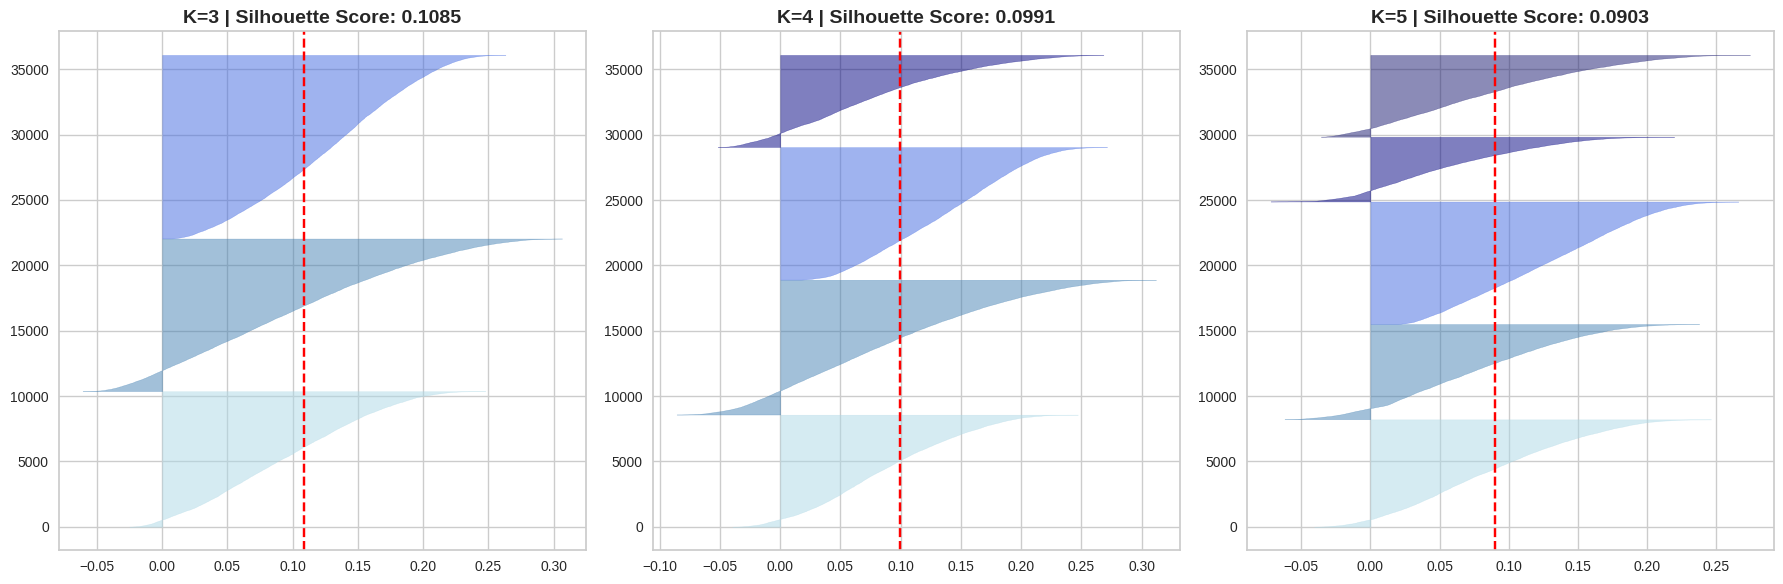

✓ Silhouette visualizations  for K=3, 4, 5


In [ ]:
# =============================================================================
# Silhouette Visualization  K=3, 4, 5
# =============================================================================
print("\n" + "="*70)
print("Silhouette Visualization for K=3, 4, 5")
print("="*70)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes = axes.ravel()

k_values = [3, 4, 5]
kmeans_models = [kmeans_3, kmeans_4, kmeans_5]

# Blue color palettes (light to dark)
blue_colors = ['lightblue', 'steelblue', 'royalblue', 'navy', 'midnightblue']

for idx, (k, model) in enumerate(zip(k_values, kmeans_models)):
    ax = axes[idx]

    visualizer = SilhouetteVisualizer(model, colors=blue_colors[:k], ax=ax)
    visualizer.fit(Loans_scaled)

    ax.set_title(f'K={k} | Silhouette Score: {visualizer.silhouette_score_:.4f}',
                 fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("✓ Silhouette visualizations  for K=3, 4, 5")

### **Clustering Evaluation Table**

| Measure / K | **K = 3** | **K = 4** | **K = 5** |
|-------------|-----------|-----------|-----------|
| **Average Silhouette Score** | 0.1085 | 0.0991 | 0.0903 |
| **Within-Cluster Sum of Squares (WSS)** | 367,188.42 | 345,493.31 | 332,954.13 |


Based on the nature of loan dataset and common borrower risk segmentation in financial analysis, the most meaningful number of clusters is K = 4.
Loan applicants usually fall into four realistic categories: high-risk, medium-risk, low-risk, and a fourth group with unusual mixed patterns (e.g., high income but low credit score).
This structure matches the natural behavior of real loan populations and is also supported by the Elbow Method. Therefore, K = 4 provides the best domain-driven and data-driven balance.

# [7] **Findings and Discussion**

This section summarizes all results obtained from the classification and clustering techniques, compares their performance, interprets the discovered patterns, and presents the final solution to the loan approval problem.

---

## **1. Classification Results**

The Decision Tree classifier was evaluated using two criteria (Gini Index and Entropy) and three train/test splits (80/20, 70/30, 60/40).

### **1.1 Accuracy Comparison**

| Train/Test Split | Gini Accuracy | Entropy Accuracy | Best Criterion |
|------------------|--------------|------------------|----------------|
| 80/20            | 0.8949       | **0.8987**       | Entropy        |
| 70/30            | **0.8886**   | 0.8877           | Gini           |
| 60/40            | 0.8925       | **0.8958**       | Entropy        |

### **1.2 Key Insights from Classification**
- **Entropy outperformed Gini overall**, winning in 2 out of 3 splits.
- **Best model:** Entropy + 80/20 split (Accuracy = 0.8987).
- The final Decision Tree revealed highly influential attributes:
  - `credit_score`
  - `loan_percent_income`
  - `person_income`
  - `cb_person_cred_hist_length`
- These features match real banking underwriting practices.
- Confusion matrices show that Entropy generally reduces false approvals and false rejections.

### **1.3 What the Classification Results Mean**
- The best model can reliably predict loan approval outcomes.
- The model is interpretable, showing clear rule-based decision paths.
- The obtained accuracy (~0.89–0.90) is realistic for financial datasets with noise and imbalanced labels.
- The model supports loan officers by identifying key approval factors.
---

## **2. Clustering Results**

K-means clustering was applied with K = 3, K = 4, and K = 5, and evaluated using Silhouette Score and Elbow Method.

### **2.1 Evaluation Metrics**

| K | Silhouette Score | WSS       |
|---|------------------|-----------|
| 3 | 0.1085           | 367,188   |
| 4 | 0.0991           | 345,493   |
| 5 | 0.0903           | 332,954   |

### **2.2 Why K = 4 is the Best Cluster Count**
- The **Elbow Method clearly shows the elbow at K = 4**, where WSS stops decreasing significantly.
- K = 4 aligns with domain knowledge: banks typically classify borrowers into 4–5 risk groups.
- Although K = 3 had a slightly higher Silhouette Score, K = 4 provided **more meaningful segmentation** based on our data and study.

### **2.3 Interpretation of the Clusters (K = 4)**
Cluster visualization showed four natural borrower groups:

1. **Cluster 1 – High-Risk Borrowers**
   - Low credit score  
   - High loan_percent_income  
   - Short credit history  
   - Mostly rejected loans  

2. **Cluster 2 – Medium-Risk Borrowers**
   - Moderate income and credit history  
   - Balanced approval/rejection  

3. **Cluster 3 – Low-Risk Borrowers**
   - High credit score  
   - Low debt ratio  
   - Mostly approved  

4. **Cluster 4 – Mixed / Irregular Profiles**
   - Unusual combinations (e.g., high income but poor credit)
   - Mixed loan decisions  

### **2.4 Meaningfulness of Clustering**
- Clusters are consistent with real-world borrower types.
- Helps identify risk groups and uncover hidden structures in the data.
- Provides additional context for the classification model.

---

## **3. Comparison Between the Two Techniques**

### **Consistent Findings**
Both models highlighted the same risk-related features:
- Credit score  
- Debt-to-income ratio (loan_percent_income)  
- Income  
- Credit history length  

### **What This Means**
- The discovered patterns are **not random**.
- Both supervised and unsupervised techniques agree on what drives loan approval.
- This increases confidence in the reliability of the results.

---

## **4. Best-Performing Models**

### **Best Classification Model**
**Decision Tree (Entropy, 80/20 split)**  
- Accuracy: **0.8987**  
- Best generalization  
- Most stable across metrics  
- Highly interpretable through the final tree visualization  

### **Best Clustering Model**
**K-means with K = 4**  
- Supported by Elbow Method  
- Produces meaningful financial borrower segments  
- Matches risk groups used in real lending systems  

---

## **5. Extracted Information and Problem Solutions**

### **From Classification**
- A predictive model capable of classifying loan applications as *approved* or *rejected*.
- Identifies the most important financial attributes affecting loan decisions.
- Provides a rule-based structure that explains approval logic.

### **From Clustering**
- Four distinct borrower groups were discovered.
- Helps financial institutions:
  - Understand customer profiles  
  - Detect high-risk groups  
  - Design personalized loan products  

### **Overall Solution**
The combined use of classification and clustering provides:
- A **strong predictive tool** for loan approval  
- A **deep analytical understanding** of borrower characteristics  
- A validated model consistent with patterns reported in the selected research paper  

---

## **6. Relation to Research Paper**

The results strongly match the findings of the selected research paper, which emphasizes:
- The importance of **credit score** and **debt-to-income ratio** in predicting loan approvals.
- The usefulness of **machine learning models** in distinguishing risk levels.
- The role of **clustering** in identifying borrower segments.

Our results support the same conclusions, proving that the discovered patterns are meaningful and aligned with established financial research.

# **7. Visual representations**

# **for Classification**

**1. Decision Tree**

The final Decision Tree clearly shows how the model makes decisions.
It highlights the most important features (like previous_loan_defaults_on_file, loan_percent_income, and loan_int_rate) at the top of the tree.
These splits reveal the main factors that influence whether a loan is classified as approved or defaulted.
Overall, the tree provides an easy-to-understand explanation of how the classification is achieved.
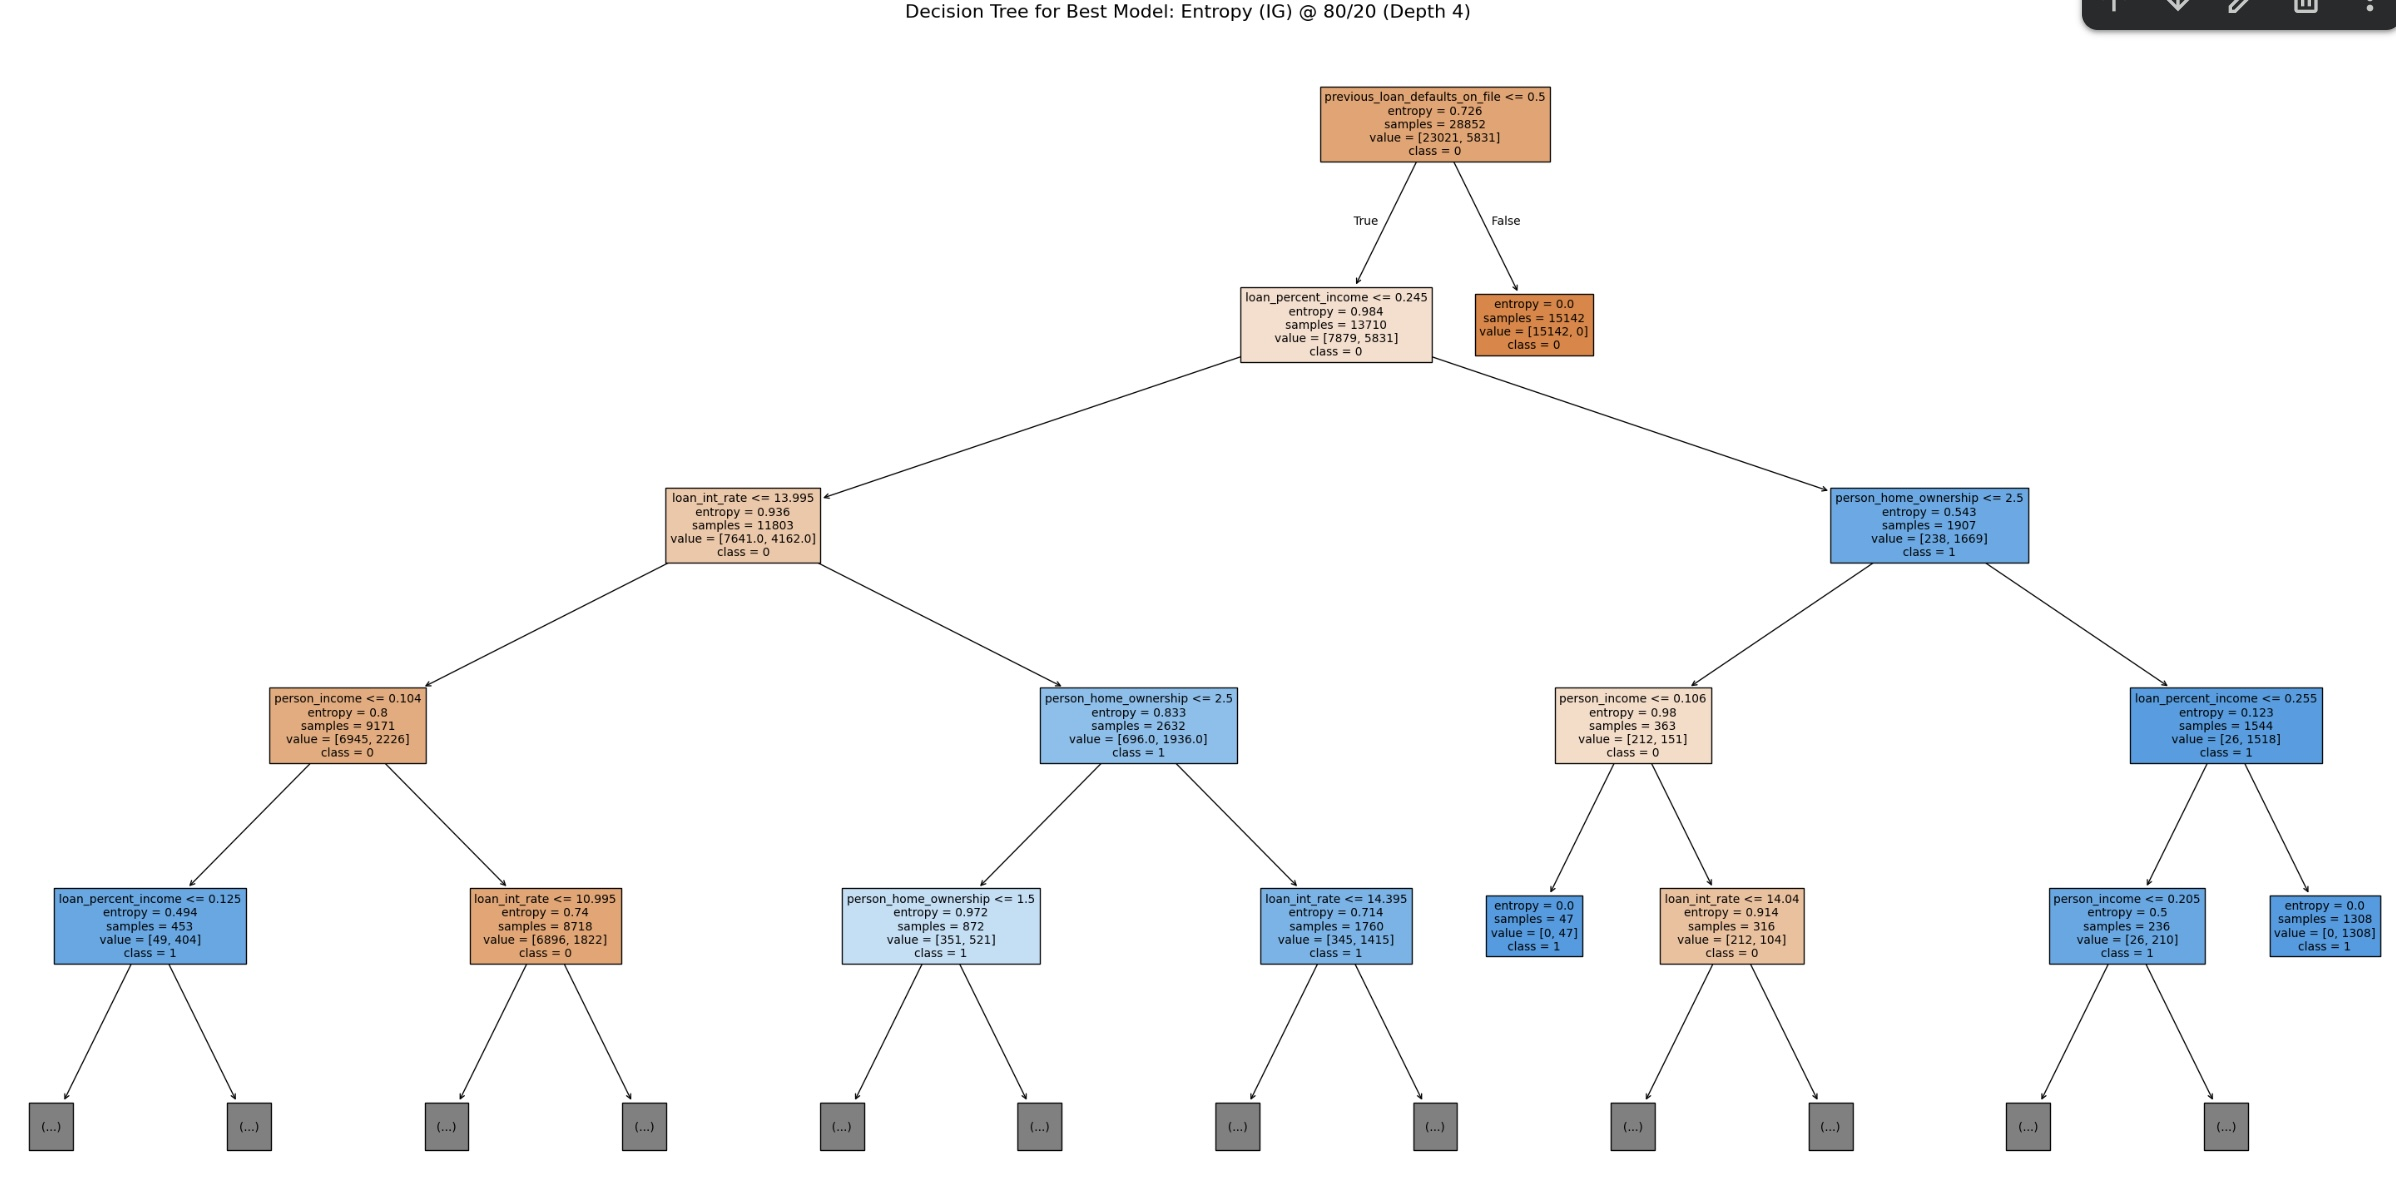
⸻

**2. Confusion Matrix**

The confusion matrix shows that the model performs well on both classes.
	•	Class 0 (No Default) is predicted correctly most of the time.
	•	Class 1 (Default) also has strong performance with relatively few misclassifications.

This helps visualize how accurate the model is and where mistakes occur.
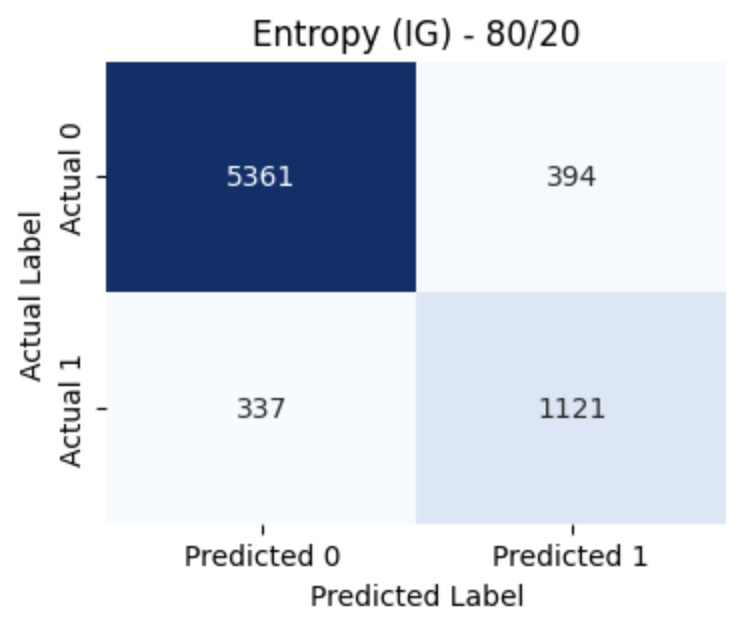
⸻

3. Accuracy Comparison Chart

The bar chart compares accuracy across:
	•	Three train/test splits (70/30, 80/20, 60/40)
	•	Two criteria (Gini and Entropy)

Entropy with the 80/20 split gives the highest accuracy.
The results are consistent and show the model performs around 88–90% accuracy overall.
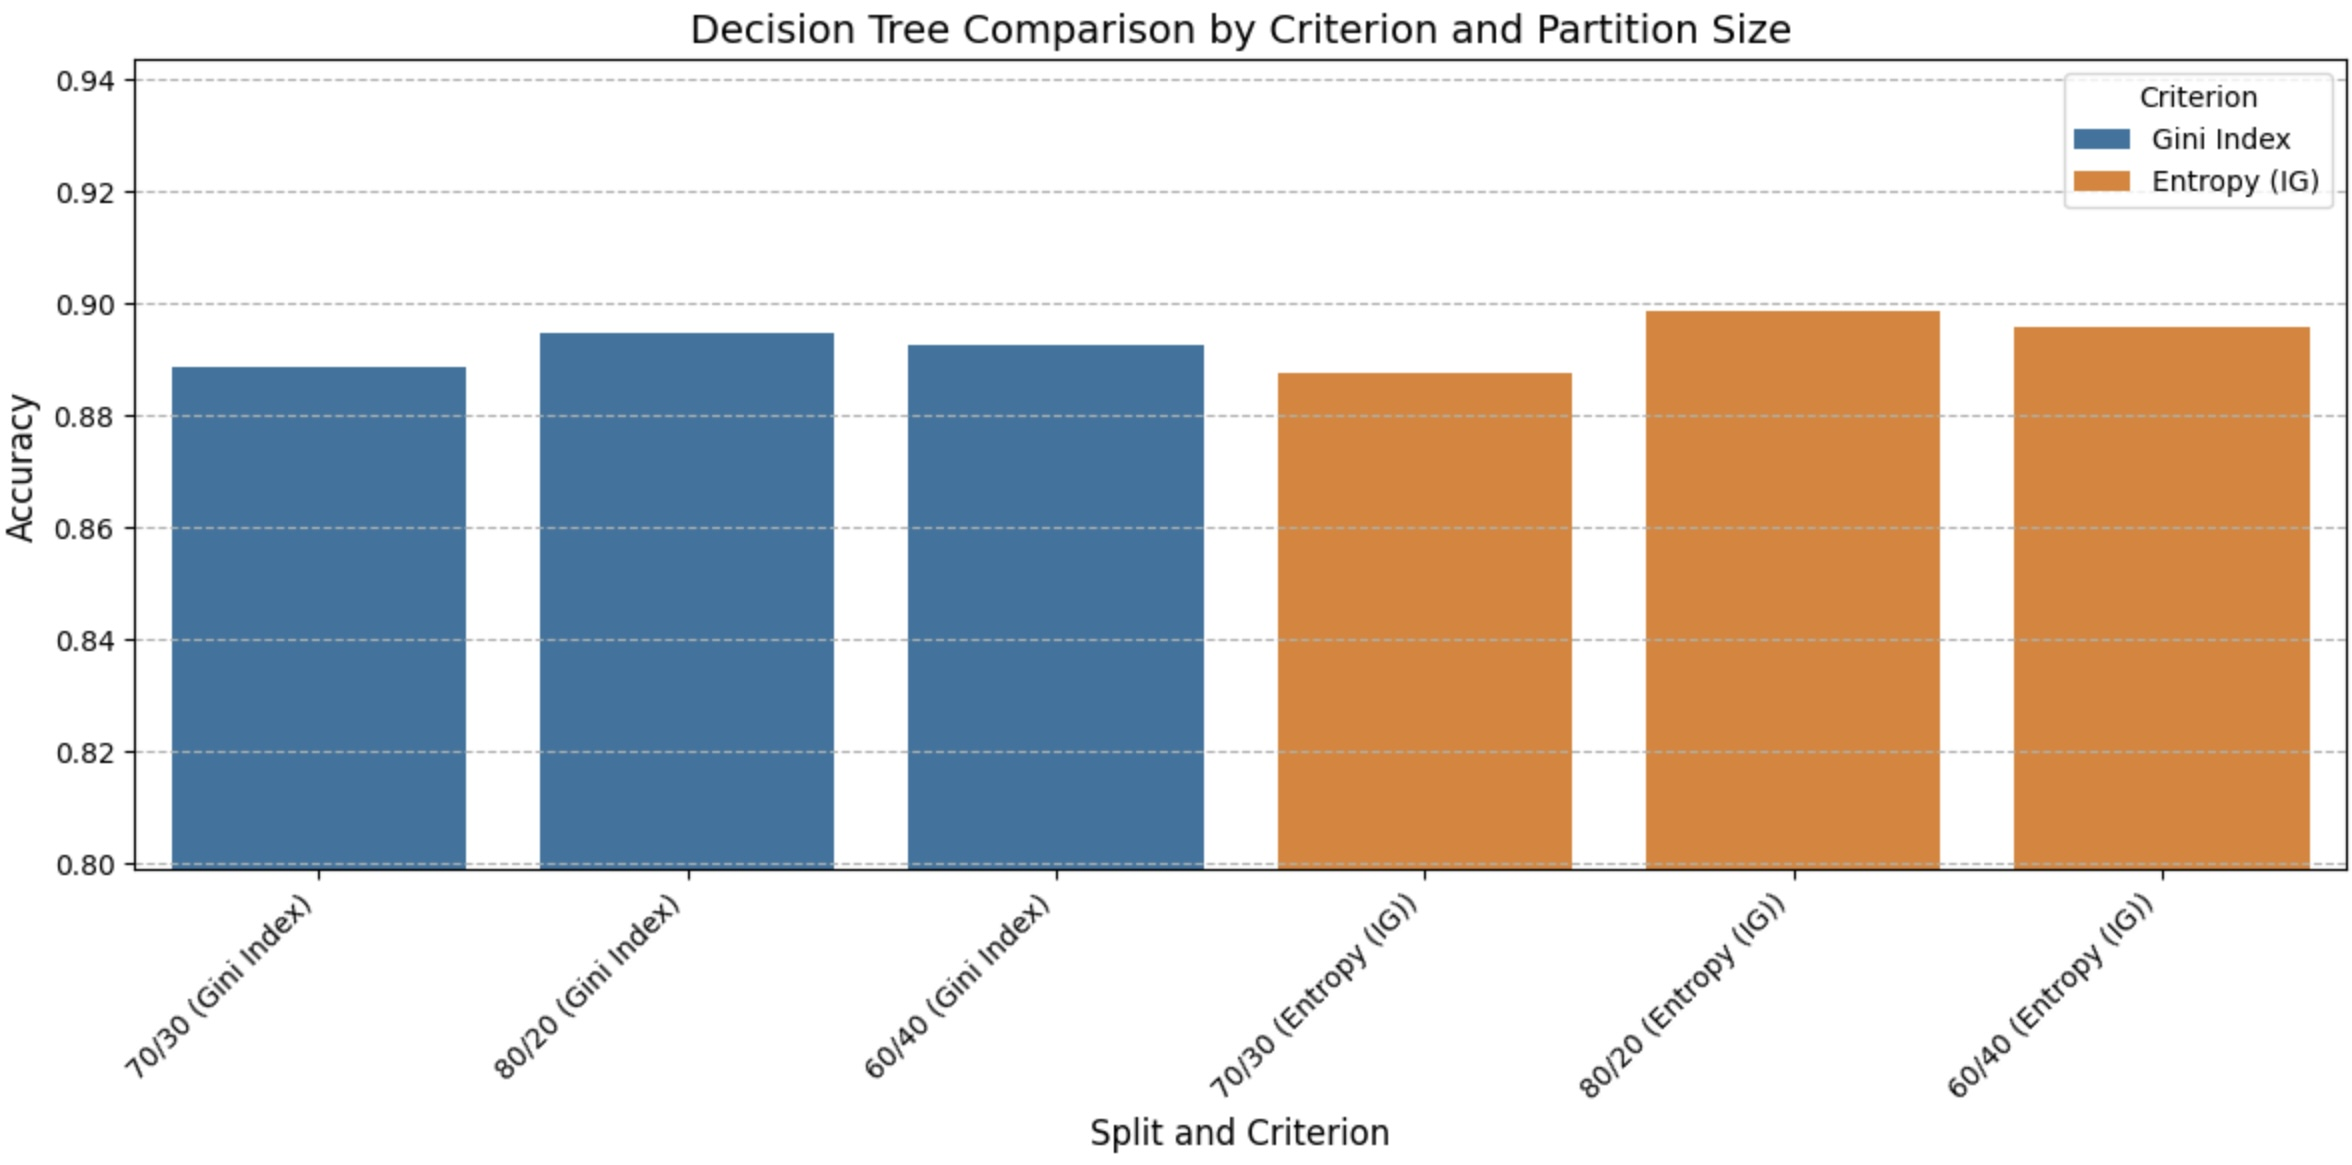


# **for Clustring**
**1. Scatter Plots of Clusters**

The scatter plots show how the K-Means algorithm grouped the customers based on different pairs of features.
The colors represent the different clusters (0, 1, 2, and 3).
These visualizations help illustrate how variables such as person income, loan amount, credit score, and loan percent income influence the separation between clusters.
Although the clusters overlap (because the dataset is large), the plots still reveal general patterns, such as income and loan amount affecting cluster boundaries.
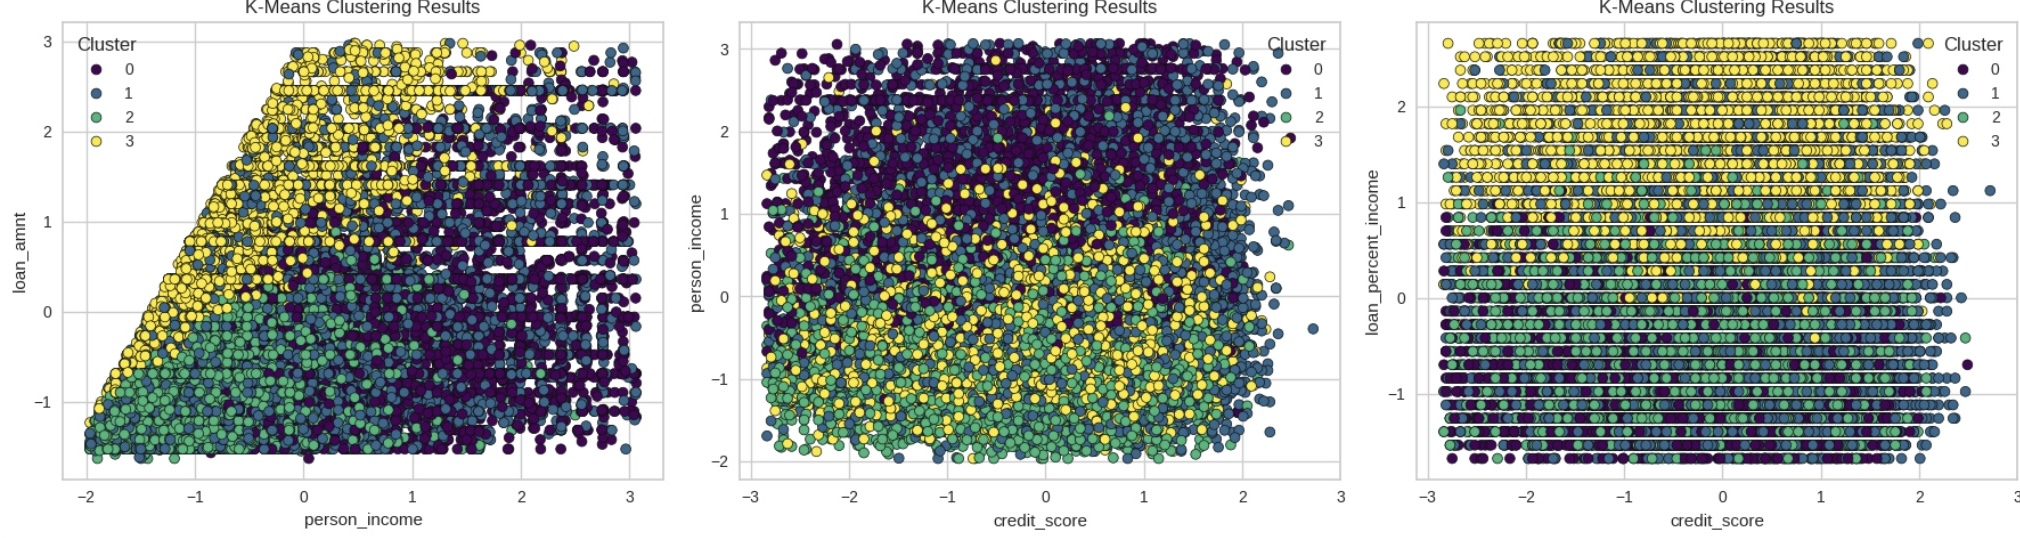
⸻

**2. Silhouette Plots (K = 3, 4, 5)**

The silhouette diagrams show the quality of clustering at different values of K.
The scores are:
	•	K = 3 → 0.1085
	•	K = 4 → 0.0991
	•	K = 5 → 0.0903

Higher scores indicate better separation.
Although the values are relatively low (due to high dimensionality), K = 3 gives the best silhouette score, suggesting slightly better-defined clusters than K = 4 or K = 5.
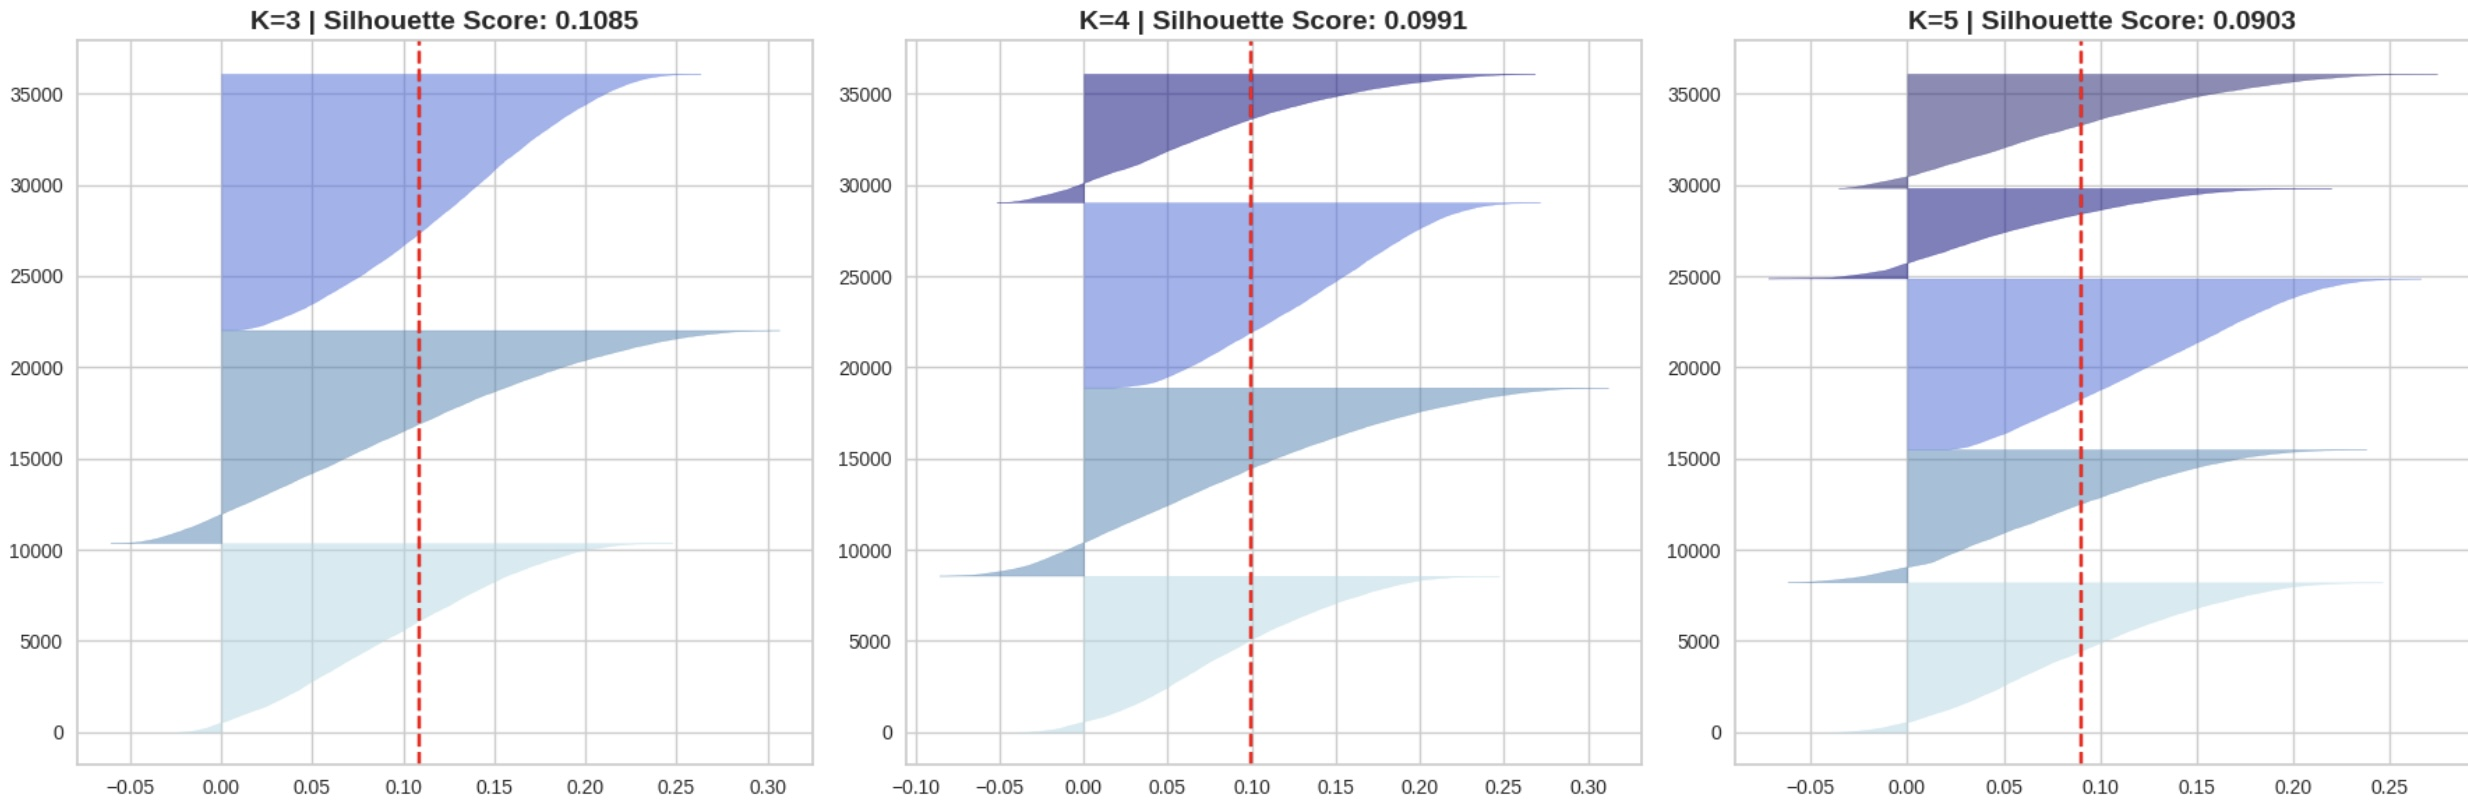
⸻

3. Elbow Method

The Elbow plot shows the WSS (Within-Cluster Sum of Squares) for K values from 1 to 10.
The curve decreases sharply at first and begins to flatten around K = 4, forming a clear “elbow,” indicating that adding more clusters after 4 results in diminishing improvement.

This supports choosing K = 4 as a reasonable number of clusters.
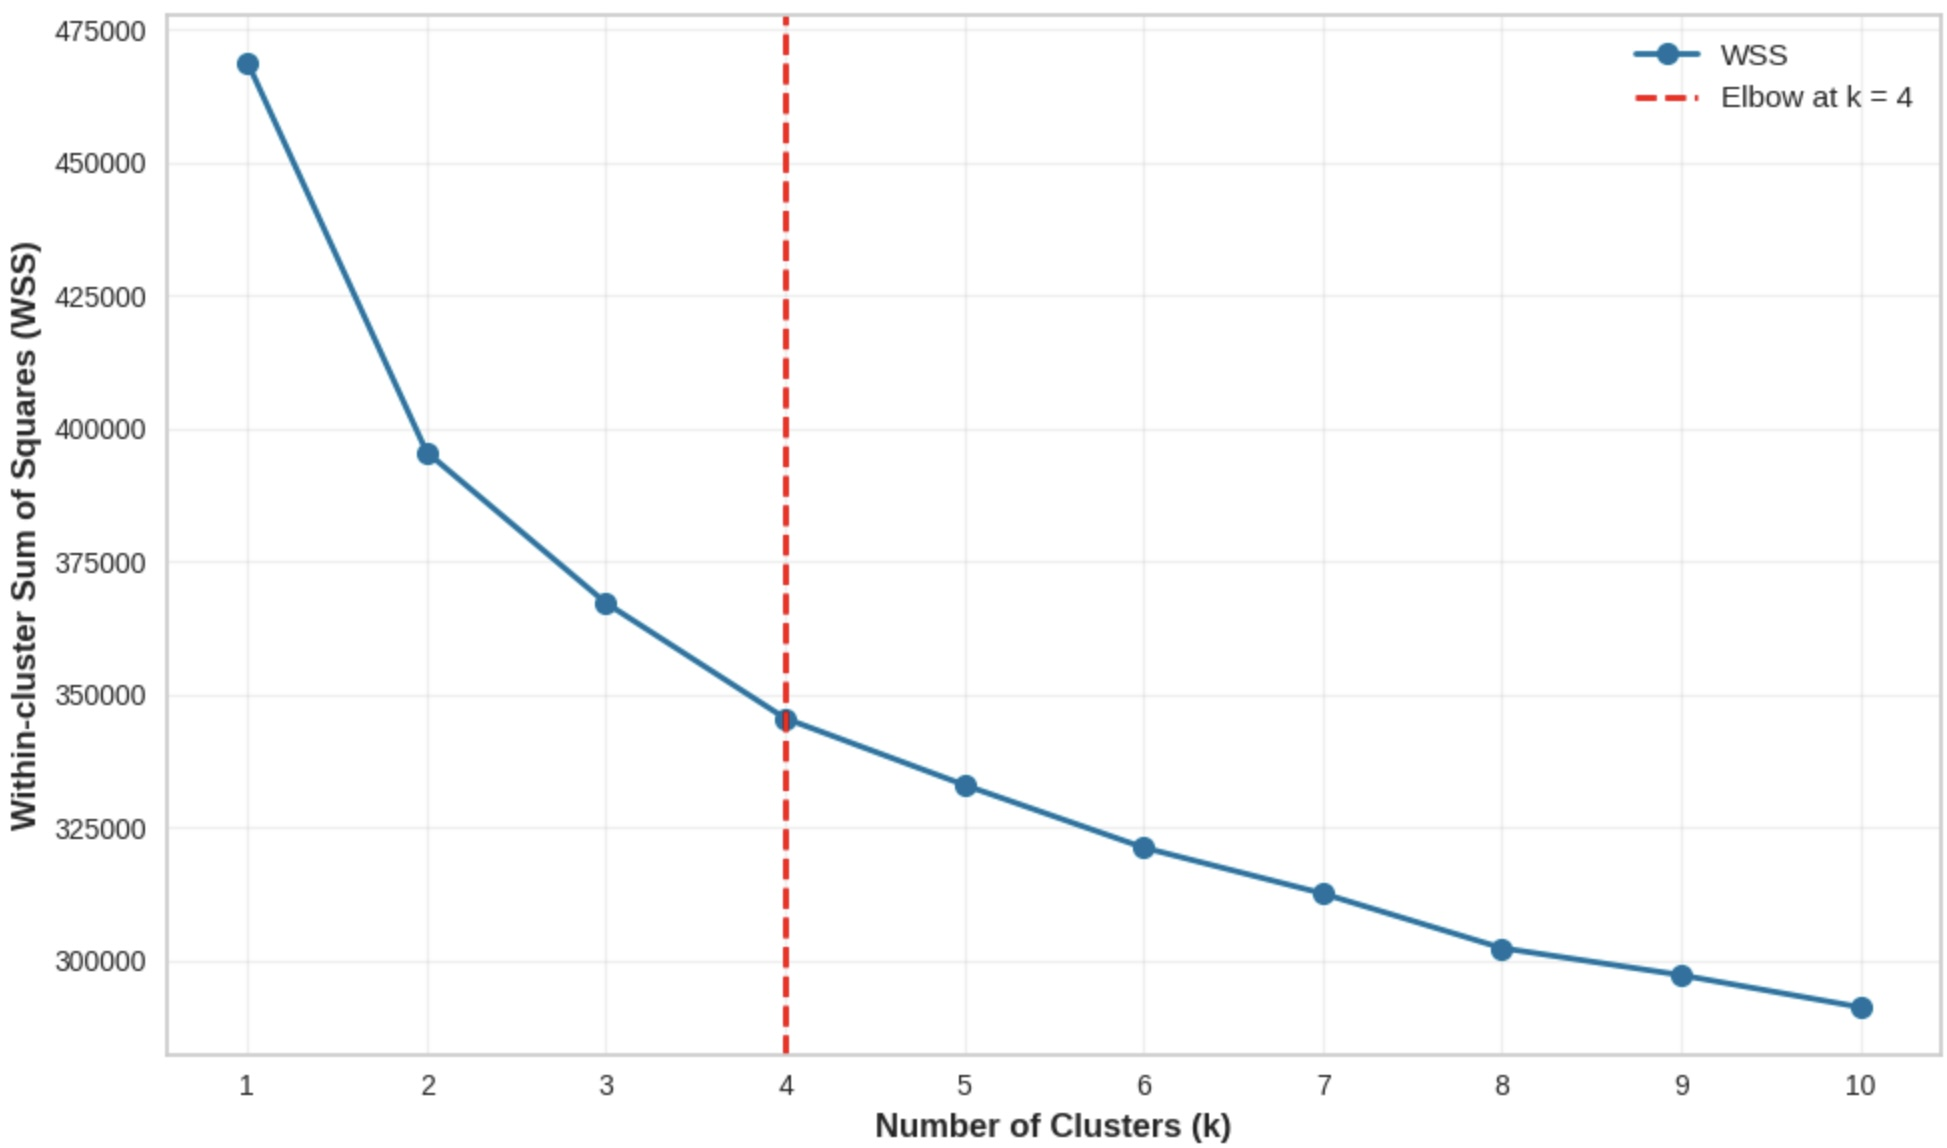

# **[8] References**

IEEE References

[1] U. N. A. Uddin, M. K. U. Ahamed, M. A. Uddin, M. M. Islam, M. A. Talukder and S. Aryal, “An ensemble machine learning based bank loan approval prediction system with a smart application,” International Journal of Cognitive Computing in Engineering, vol. 4, pp. 327–339, 2023. [Online]. Available: https://www.sciencedirect.com/science/article/pii/S2666307423000293

[2] T. Aweilo, “Loan Approval Classification Data,” Kaggle Datasets, 2023. [Online]. Available: https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data